<a href="https://colab.research.google.com/github/allenphos/Study-projects/blob/main/credit_app_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Application Data Preprocessing

This project focuses on preprocessing a dataset containing credit application information. The goal is to clean, transform, and prepare the data for further analysis and modeling, which could be used for credit risk assessment and loan approval decisions.

This work was completed as part of a homework assignment, with guidance and support from instructors and resources provided in the course. The preprocessing pipeline implemented in this project involves the following steps:

1. **Data Type Conversion:** Correcting the data types of relevant columns to ensure consistency.
2. **Handling Missing Values:** Addressing missing data through imputation or removal based on the percentage of missing values.
3. **Data Cleaning:** Correcting incorrect or unknown values and transforming date-related features to a more usable format.
4. **Outlier Handling:** Identifying and analyzing outliers in key numerical features.
5. **Data Transformation:** Creating new features from existing ones, such as age and employment duration.
6. **Binning Continuous Variables:** Grouping continuous variables into categories for analysis.


By following these steps, we aim to create a clean, consistent, and reliable dataset that can be used to build robust credit risk models and understand the factors influencing creditworthiness.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Data Import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the data.

In [3]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/credit/application_data.csv.zip")

In [4]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Checking the data structure

In [5]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
df.shape

(307511, 122)

We have ~307k rows and 122 columns.

## Statistical report for numerical variables

In [7]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Analysis of Categorical Variables

In [8]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
# Checking the number of categorical variables
len(df.select_dtypes(include = "object").columns)

16

The data contains 16 `categorical` variables.

# Analysis of Numerical Variables

In [10]:
number_df = df.select_dtypes(include="number")

In [11]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [12]:
number_df = df.select_dtypes(include="number")

The data contains 106 `numerical` variables.

In [13]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Working with Incorrect Data Types

Checking if we have a column with the wrong data type.

In [14]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
LIVE_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE                object
EXT_SOURCE_1                    float64
EXT_SOURCE_2                    float64
EXT_SOURCE_3                    float64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
FLOORSMIN_MEDI                  float64
LANDAREA_MEDI                   float64
LIVINGAPARTMENTS_MEDI           float64
LIVINGAREA_MEDI                 float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAREA_MEDI              float64
FONDKAPREMONT_MODE               object
HOUSETYPE_MODE                   object
TOTALAREA_MODE                  float64
WALLSMATERIAL_MODE               object
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
FLAG_DOCUMENT_2                   int64
FLAG_DOCUMENT_3                   int64
FLAG_DOCUMENT_4                   int64
FLAG_DOCUMENT_5                   int64


Looking at the data and their corresponding data types, we can change

1.   List element
2.   List element

the data type of the SKU column.

In [15]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

We can also change all `flag` columns to a data type that is more storage-efficient.

Here is how much memory in MB our data currently occupies.

In [16]:
df.memory_usage().sum()/1024/1024

286.22710037231445

So, we can potentially save 57 MB of memory! And transforming our data frame will be easier. Let's change the type.

In [17]:
flag_cols = ['флаг' in col.lower() for col in df.columns]

In [18]:
df[df.columns[flag_cols]].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [19]:
df[df.columns[flag_cols]].nunique()  # Count unique values in specified columns

Series([], dtype: float64)

Each data type occupies a certain number of bytes in memory. Let's find out how much 1 int8 type and 1 int64 type occupy and how much memory we will save if we change the type.

In [20]:
import numpy as np
from sys import getsizeof

In [21]:
getsizeof(np.int64(1))

32

In [22]:
getsizeof(np.int8(1))

25

In [23]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024 # This calculates the total bytes saved by multiplying the bytes saved per data point (7) by the number of rows (df.shape[0]) and the number of flag columns (sum(flag_cols)).

0.0

In [24]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [25]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)  #If the condition is False (the cell value is not 'Y'), np.where() will replace that value with 0.

In [26]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [27]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [28]:
df.memory_usage().sum()/1024/1024

286.22710037231445

# Working with missing values

Let's check if there are any null values in our dataset.

In [29]:
df.isnull().values.any()

True

Let's calculate the total number of null values in the dataset.

In [30]:
df.isnull().values.sum()

9152465

Let's create a list of columns with null values.

In [31]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [32]:
len(df.columns[df.isnull().any()])

67

A total of `67` columns have one or more NULL values in the data.

## Number and percentage of missing values in columns

In [33]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)  # Percentage of null values

In [34]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage}) #Creating a DataFrame to Summarize Missing Data
null_df.reset_index(drop = True, inplace = True) # Resetting the Index

In [35]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Removing columns with NULL values > 40%

Let's create a list of columns with NULL values > 40%. We will remove these columns from the dataframe since they have too many missing values.

In [36]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [37]:
df.shape

(307511, 122)

A total of `49` columns need to be removed. Removing them from the main dataframe **`df`**.

In [38]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Verification of column count after deletion. There should be only `73` columns left.

In [39]:
df.shape

(307511, 73)

## Checking columns with NULL values < 40%

Creating a dataframe `null_df_under40` with columns where the percentage of missing values is less than 40%

In [40]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [41]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Let's process each of the columns.

### Analysis of the `OCCUPATION_TYPE` Column

- null values = 31.35%

In [42]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Replacing NULL values with the category `Unknown`

In [43]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True) #creating Unknown

<ipython-input-43-4c31aba9d375>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True) #creating Unknown


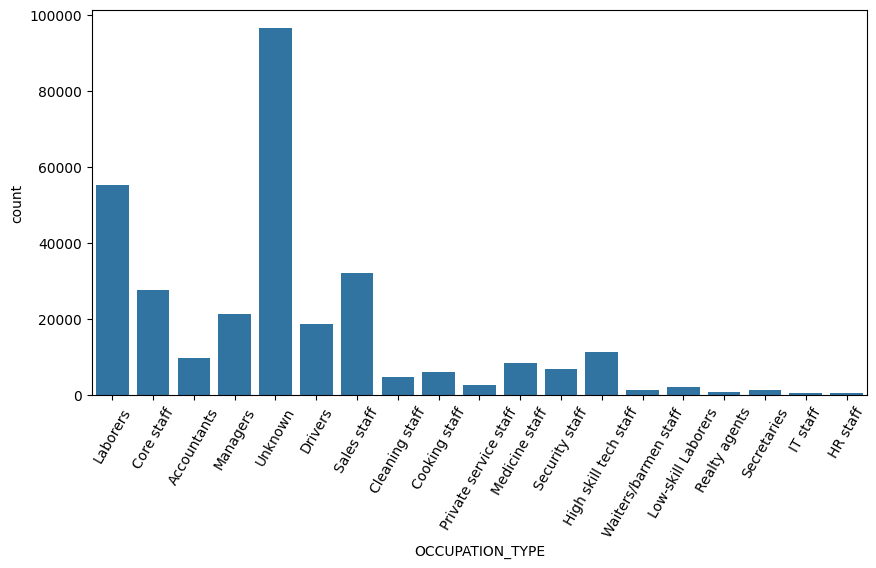

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 60)
plt.show()

**Observations**
- If we look at the graph, the largest number of credit applicants are `Laborers`
- For imputation, it is better to leave the data as is (the missing values account for 31.35%) and not to perform imputation using any constant, such as mode or min/max median, if it is a numerical column, as this may distort the data in further calculations.

### Analysis of the column `EXT_SOURCE_3`

- missing values = 19.83%

In [45]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

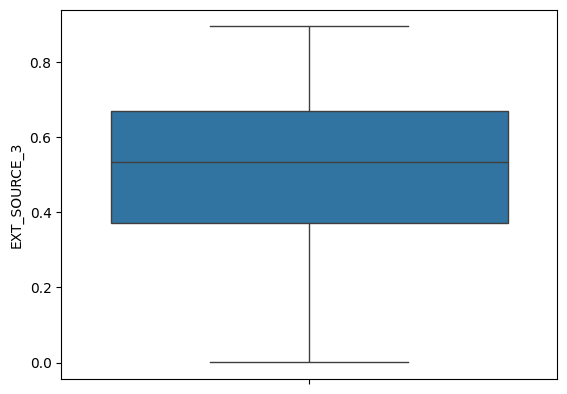

In [46]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Obtaining percentile values for `EXT_SOURCE_3`

In [47]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])  # Calculate the quantiles for EXT_SOURCE_3

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

The most frequently occurring value in `EXT_SOURCE_3`

In [48]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Checking the mean value of `EXT_SOURCE_3`

In [49]:
# Calculate the mean of EXT_SOURCE_3

**Observations**
-  Looking at the box plot, the median is 0.535276
-  The most frequently occurring value is 0.74630
-  The average value is 0.51085
-  Although the average and median are closer and can be used for imputation, since the missing percentage is higher (19.83%), it is better to leave the data as is and not perform imputation. If the method requires imputation, we can impute the data using the median and create another column indicating which values were imputed.

# Analysis of the `AMT_REQ_CREDIT_BUREAU` columns with missing values

In [50]:
null_df_under40.loc[null_df_under40['column_name'].isin(['AMT_REQ_CREDIT_BUREAU_YEAR', "AMT_REQ_CREDIT_BUREAU_MON", 'AMT_REQ_CREDIT_BUREAU_WEEK'])]

column_name  null_count  null_percentage
118  AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119   AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
121  AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50

Missing values = 13.50%

AMT_REQ_CREDIT_BUREAU_YEAR

In [51]:
mean_b_y = df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()
median_b_y = df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
mode_b_y = df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]
proc_b_y = df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum() / df.shape[0] * 100

print("AMT_REQ_CREDIT_BUREAU_YEAR")
print(f"Mean: {mean_b_y}")
print(f"Median: {median_b_y}")
print(f"Mode: {mode_b_y}")
print(f"Percentage of missing values: {proc_b_y}")

AMT_REQ_CREDIT_BUREAU_YEAR
Mean: 1.899974435321363
Median: 1.0
Mode: 0.0
Percentage of missing values: 13.501630835970097


AMT_REQ_CREDIT_BUREAU_MON

In [52]:
mean_b_m = df['AMT_REQ_CREDIT_BUREAU_MON'].mean()
median_b_m = df['AMT_REQ_CREDIT_BUREAU_MON'].median()
mode_b_m = df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
proc_b_m = df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum() / df.shape[0] * 100

print("AMT_REQ_CREDIT_BUREAU_MON")
print(f"Mean:{mean_b_m}")
print(f"Median: {median_b_m}")
print(f"Mode: {mode_b_m}")
print(f"Percentage of missing values: {proc_b_m}")

AMT_REQ_CREDIT_BUREAU_MON
Mean:0.26739526000781977
Median: 0.0
Mode: 0.0
Percentage of missing values: 13.501630835970097


AMT_REQ_CREDIT_BUREAU_WEEK

In [53]:
mean_b_w = df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()
median_b_w = df['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
mode_b_w = df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]
proc_b_w = df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum() / df.shape[0] * 100

print("AMT_REQ_CREDIT_BUREAU_WEEK")
print(f"Mean:{mean_b_w}")
print(f"Median: {median_b_w}")
print(f"Mode: {mode_b_w}")
print(f"Percentage of missing values: {proc_b_w}")

AMT_REQ_CREDIT_BUREAU_WEEK
Mean:0.0343619356973142
Median: 0.0
Mode: 0.0
Percentage of missing values: 13.501630835970097


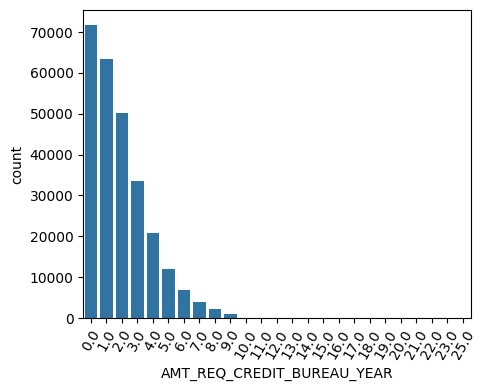

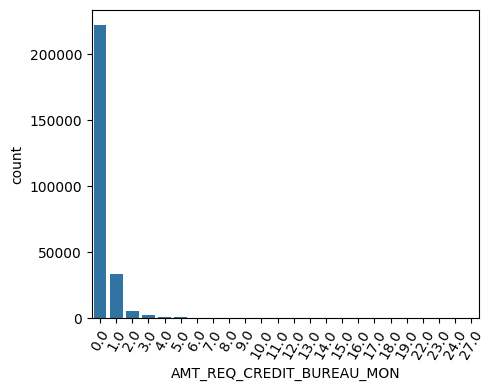

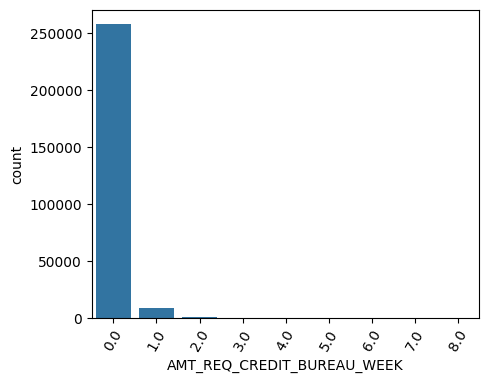

In [54]:
plt.figure(figsize = (5,4))
sns.countplot(data = df, x = "AMT_REQ_CREDIT_BUREAU_YEAR")
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize = (5,4))
sns.countplot(data = df, x = "AMT_REQ_CREDIT_BUREAU_MON")
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize = (5,4))
sns.countplot(data = df, x = "AMT_REQ_CREDIT_BUREAU_WEEK")
plt.xticks(rotation = 60)
plt.show()

- The average value in the columns AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK is - 1.89, 0.26, 0.03 respectively.
- The most frequently occurring value in all columns is - 0.0
- The median is - 1.0, 0.0, 0.0
- The outlier values are not very significant.

Since the percentage of missing data is 13.50 and 0.0 is the most frequent value, the data should be left as is. If imputation is needed, the data in the column AMT_REQ_CREDIT_BUREAU_YEAR can be filled with the median (1.0) and indicated with a flag column. In the mon and week columns, the values can also be filled with the median (0.0).

## Checking columns with NULL values > 0% and < 1%

Creating a dataframe `null_df_under1` with the percentage of missing values > 0% and < 1% in each column.

In [55]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]  # Filter rows where null_percentage is greater than 0 and less than 1

In [56]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Analysis of the `NAME_TYPE_SUITE` Column

In [57]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [58]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

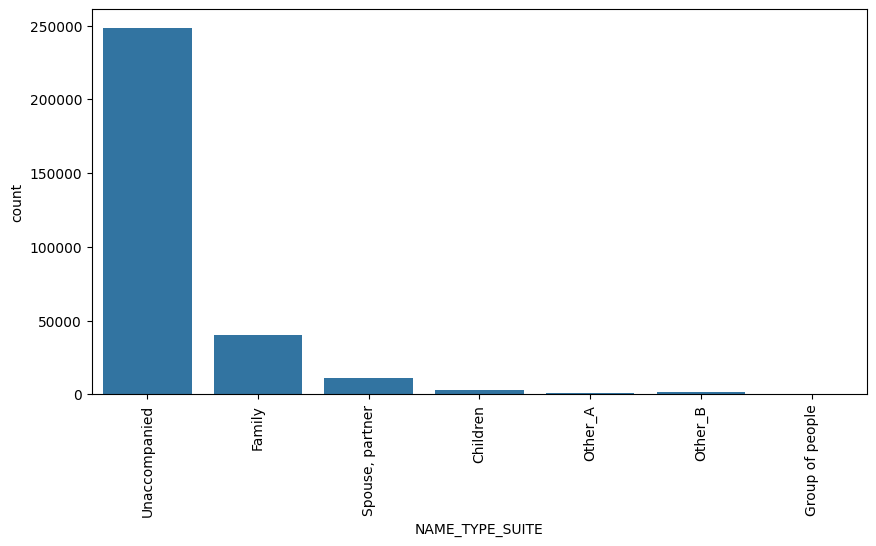

In [59]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Observations**
-   Looking at the graph, the category `Unaccompanied` has the highest number of loan applicants. Therefore, most borrowers are willing to apply for a loan without accompaniment.
- We can continue imputing `Unaccompanied` in the dataframe, but it is better to prefer the second option.
- We could also impute data with the value `NA`, as this column is categorical.
- Similarly, if a column is missing less than 1% of data, we can drop it. But if we remove all data in all columns where missing data is <=1%, we might remove too much data. Therefore, I mostly keep the data as much as possible.

In [60]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

<ipython-input-60-9eba76e3e9b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)


In [61]:
df.fillna({'NAME_TYPE_SUITE': 'NA'}, inplace=True) #replaces all missing values

### Analysis of the column `OBS_30_CNT_SOCIAL_CIRCLE`

In [62]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [63]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

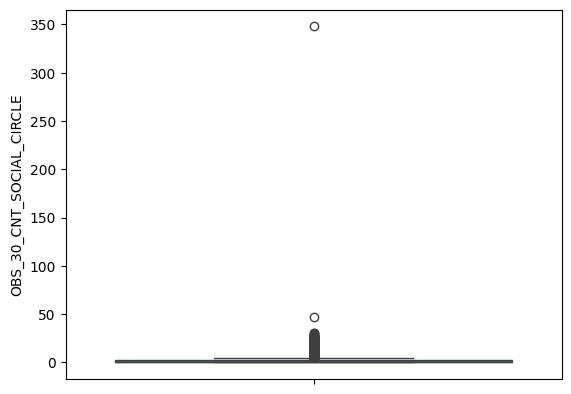

In [64]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Calculation of percentiles `OBS_30_CNT_SOCIAL_CIRCLE`

In [65]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])  # Calculate the quantiles for the social circle count.

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

The most frequently occurring value in `OBS_30_CNT_SOCIAL_CIRCLE`

In [66]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Average value of `OBS_30_CNT_SOCIAL_CIRCLE`

In [67]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

**Observations**
- Looking at the box plot, the median is 0.0
- The most frequently occurring value is 0.0
- The average value is 1.4222
- There are two outlier values at 50 and 350.
- The median and mode are close (considering the range of data in this column) and can be used for imputation. This will not lead to bias, as the percentage of missing values is small (0.33%)

In [68]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

<ipython-input-68-2ec5564a2152>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)


# Analysis of EXT_SOURCE_2 and AMT_GOODS_PRICE and filling in missing values in columns with a small percentage of missing data

Analysis of EXT_SOURCE_2

In [69]:
null_df_under1[null_df_under1.column_name == 'EXT_SOURCE_2']

column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21

In [70]:
def col_analys(df, col_name):

  print(f"Value count (10): {df[col_name].value_counts().head(10)}")
  print(f"{sns.boxplot(df[col_name])} {plt.show()}")

  print(f"\nPercentile: \n{df[col_name].quantile(q = [0.25,0.5,0.75,1])}")

  print(f"\nMean: {df[col_name].mean()}")
  print(f"Median: {df[col_name].median()}")
  print(f"Mode: {df[col_name].mode()[0]}")

Value count (10): EXT_SOURCE_2
0.29    721
0.26    417
0.27    343
0.16    322
0.27    306
0.27    244
0.26    243
0.16    238
0.16    234
0.16    184
Name: count, dtype: int64


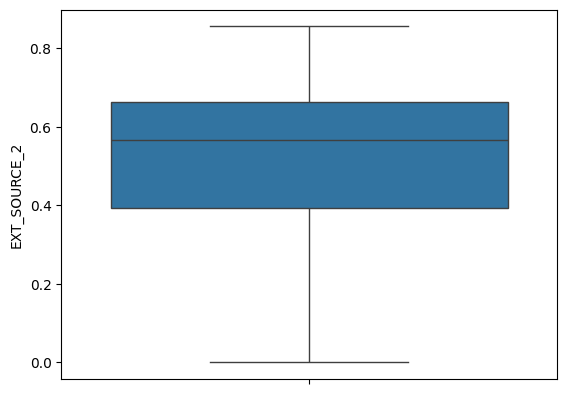

Axes(0.125,0.11;0.775x0.77) None

Percentile: 
0.25   0.39
0.50   0.57
0.75   0.66
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64

Mean: 0.5143926741308462
Median: 0.5659614260608526
Mode: 0.2858978721410488


In [71]:
col_analys(df, 'EXT_SOURCE_2')

EXT_SOURCE_2

- Mean - 0.51
- Median - 0.56
- Mode - 0.28

Since the mode differs, the data is not very symmetrical, so we can fill in the missing data with the median. This will not lead to bias, as the percentage of missing values is small (0.21%).

In [72]:
df.fillna({'EXT_SOURCE_2': df['EXT_SOURCE_2'].median()}, inplace=True)

In [73]:
df['EXT_SOURCE_2'].isnull().any()

False

Analysis of AMT_GOODS_PRICE

In [74]:
null_df_under1[null_df_under1.column_name == 'AMT_GOODS_PRICE']

column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09

Value count (10): AMT_GOODS_PRICE
450000.00     26022
225000.00     25282
675000.00     24962
900000.00     15416
270000.00     11428
180000.00     10123
454500.00      9157
1125000.00     9050
135000.00      8206
315000.00      5225
Name: count, dtype: int64


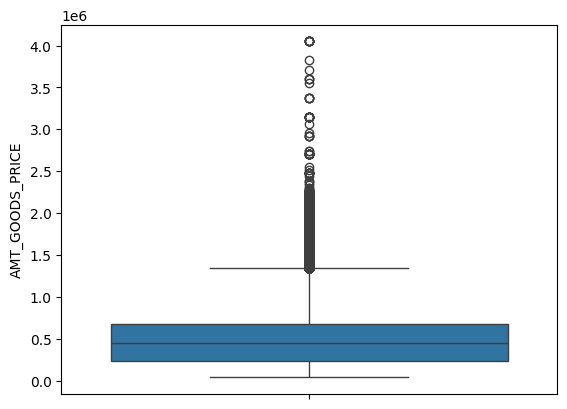

Axes(0.125,0.11;0.775x0.77) None

Percentile: 
0.25    238500.00
0.50    450000.00
0.75    679500.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Mean: 538396.2074288895
Median: 450000.0
Mode: 450000.0


In [78]:
col_analys(df, 'AMT_GOODS_PRICE')

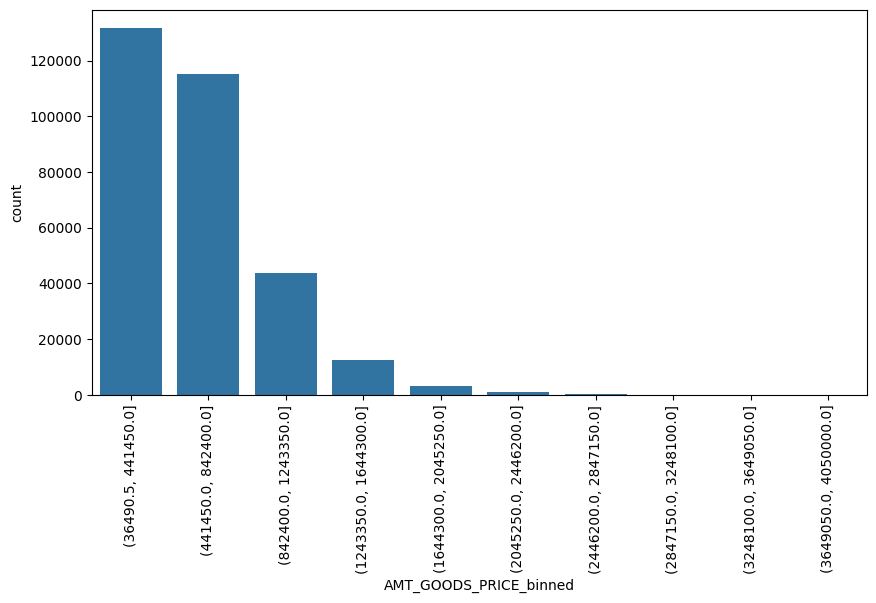

In [79]:
# Grouping values of AMT_GOODS_PRICE
df['AMT_GOODS_PRICE_binned'] = pd.cut(df['AMT_GOODS_PRICE'], bins=10)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="AMT_GOODS_PRICE_binned")
plt.xticks(rotation=90)
plt.show()

- Mean - 538396.20
- Median - 450000.0
- Most frequently occurring value - 450000.0

The mode and median are the same, so we can fill in the missing data with these values. This will not lead to bias, as the percentage of missing values is small (0.09%).

In [80]:
df.fillna({'AMT_GOODS_PRICE': df['AMT_GOODS_PRICE'].median()}, inplace=True)

In [81]:
df['AMT_GOODS_PRICE'].isnull().any()

False

# Working with incorrect/unknown data values

### Analysis of the `CODE_GENDER` column

Value range check

In [82]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

The gender must be either male or female. The value `XNA` may indicate that the value was not provided by the applicant or was skipped by the credit specialist reviewing the application.

In [83]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Since the data appears to be reliable, we will check the possibility of applying the imputation method.
- There are twice as many female applicants as male applicants.
- Therefore, we will set `CODE_GENDER` to 'F'.

In [84]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Check if `XNA` has been removed.

In [85]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Analysis of the `DAYS_BIRTH` Column

In [86]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

There are ~17K+ unique records, all of which seem to have negative values.

In [87]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [88]:
df['DAYS_BIRTH'].nunique()

17460

In [89]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Transforming `Days Birth` into positive days

In [90]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)  # Convert negative days to positive

In [91]:
df['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24898     1
24868     1
8017      1
25098     1
25061     1
Name: count, Length: 17460, dtype: int64

All days in `DAYS_BIRTH` have positive values - this may be more convenient for analysis.

#### Let's create a new column `YEARS_BIRTH` for easier analysis.

In [92]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))  # Calculate age in years from days of birth

### Analysis of the `NAME_FAMILY_STATUS` Column

Value range check

In [93]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

The gender must be either male or female. The value `Unknown` may indicate that the value was not specified by the applicant or was missed by the credit specialist reviewing the application.

In [94]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00        450000.00              NA  Commercial associate   
187348     29250.00        450000.00              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [95]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Since the data appears to be reliable, we will continue to check the imputation method.
- Married applicants make up over 63% of applicants.
- Therefore, we will set `NAME_FAMILY_STATUS` to `Married`.

In [96]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Check if `Unknown` has been removed.

In [97]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Analysis of the column `DAYS_EMPLOYED`

In [98]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [99]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: proportion, Length: 12574, dtype: float64

In [100]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [101]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: count, Length: 12573, dtype: int64

In [102]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [103]:
df['DAYS_EMPLOYED'].nunique()

12574

**Observations**
- There are ~55K+ records where `DAYS_EMPLOYED` equals 365243 days
- The remaining 252K+ records have negative values for days
- There are 12,574 unique values for `DAYS_EMPLOYED`

- The column `DAYS_EMPLOYED` indicates how many days before the application submission the person started their current job; the applicant/credit specialist should enter negative values to indicate the days preceding the application submission date.<br>
- We convert the negative values in `DAYS_EMPLOYED` to positive days to standardize the days when used in calculations.

In [104]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)  # Convert negative values to positive for DAYS_EMPLOYED

In [105]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

We see that all days in `DAYS_EMPLOYED` have positive values.

**For ~55K+ records where `DAYS_EMPLOYED` is 365243 days**
- Converting this to years, we get 1000 years, which is physically impossible for the applicant's employment
- This corresponds to 18% of the data and cannot be an anomaly
- They may be either retirees or unemployed, and looking at the data, our conclusion is correct

> There are two ways to handle this
>> 1) We leave the data as is and take this into account during the analysis OR <br>
>> 2) We calculate the average number of days employed excluding this category and replace it instead of 365243 days for retirees. <br>
>> For the unemployed, the number of days employed can be 0

*Note*
 - During calculations in this column, we must consider this scenario, as otherwise it distorts our results

In [106]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Let's create a new column `YEARS_EMPLOYED` for easier analysis.

In [107]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))  # Calculate years employed from days employed

### Analysis of the `DAYS_REGISTRATION` Column

In [108]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [109]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [110]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [111]:
df['DAYS_REGISTRATION'].nunique()

15688

Conversion of `DAYS_REGISTRATION` to positive days

In [112]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)  # Convert negative registration days to positive

In [113]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

All days in `DAYS_REGISTRATION` have positive values.

#### Let's create a new column `YEARS_REGISTRATION` for easier analysis.

In [114]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))  # Convert days of registration to years

### Analysis of the column `DAYS_ID_PUBLISH`

In [115]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [116]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [117]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [118]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Conversion of `DAYS_ID_PUBLISH` to positive days

In [119]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)  # Apply a function to convert negative values to positive in the DAYS_ID_PUBLISH column

In [120]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

All days in `DAYS_ID_PUBLISH` have positive values.

#### Let's create a new column `YEARS_ID_PUBLISH` for easier analysis.

In [121]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Analysis of the column `DAYS_LAST_PHONE_CHANGE`

In [122]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [123]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [124]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [125]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Conversion of `DAYS_LAST_PHONE_CHANGE` to positive days

In [126]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [127]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

All days in `DAYS_LAST_PHONE_CHANGE` have positive values.

#### Creating a new column `YEARS_LAST_PHONE_CHANGE` for easier analysis

In [128]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Automatic Functions

### Creating the function `age_cat` for categorizing `YEARS_BORNING`

In [129]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### One-dimensional (categorical vs target) and two-dimensional (categorical vs categorical) analysis (histogram) - categorical columns

In [130]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Normalized distribution of values by category: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # annotation of values in the bar plot
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Count of data by category: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Clients with payment difficulties'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Clients with timely payments'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()

### Calculation of the minimum and maximum range of deviations for numerical columns

In [131]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Working with Outliers for Numerical Columns

In [132]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Distribution plot for ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Boxplot for ' + column
      plt.title(pltname)

      plt.show()

### Analysis of the column `CNT_CHILDREN`

In [133]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
Name: count, dtype: int64

In [134]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

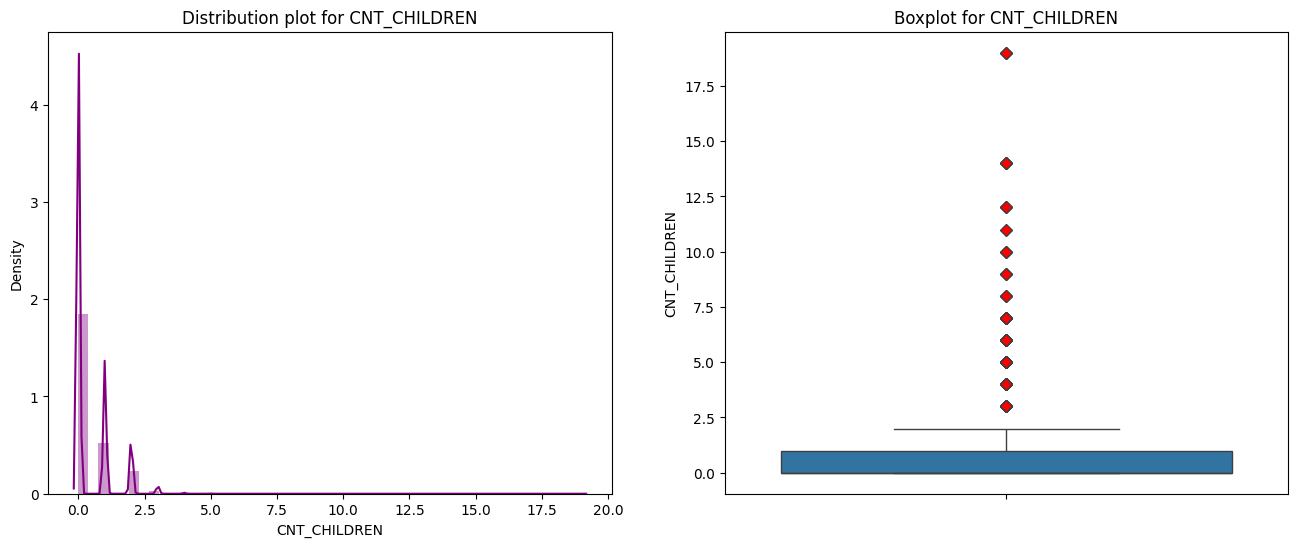

In [135]:
dist_box(df,'CNT_CHILDREN')

Let's calculate the IQR (Inter Quartile Range)

In [136]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


The values *before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers.

In [137]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value beyond which there are outliers: {}".format(Min_value))
print("Maximum value beyond which there are outliers: {}".format(Max_value))

Minimum value beyond which there are outliers: -1.5
Maximum value beyond which there are outliers: 2.5


**Observations**
- Looking at the data, we see that the number of applicants with more than 7 children is very minimal (2 or 3 in each category).
- Additionally, looking at the data for applicants with 10 children, the applicants are only 31 and 41 years old, respectively. This appears to be an isolated case and can be considered an outlier.
- Both the distribution and box plots clearly show that values exceeding 2.5 are outliers.

**Conclusion**
- Applicants with 3 or more children are outlier cases. We can provide a special analysis for these cases.

### Analysis of the column `AMT_INCOME_TOTAL`

In [138]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [139]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [140]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Let's build a graph for `AMT_INCOME_TOTAL`

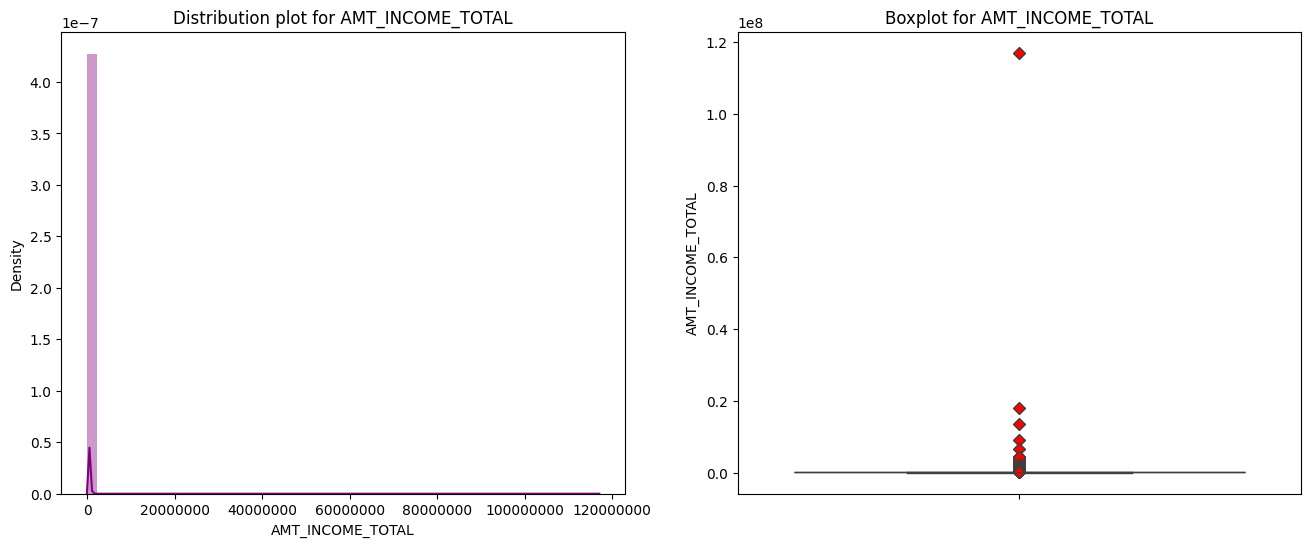

In [141]:
dist_box(df,'AMT_INCOME_TOTAL')

- The final result graphs are very thin, and we can observe an outlier of about ~120 million.

Let's build a graph considering only the income below the 99.9% value, that is, 900 thousand.

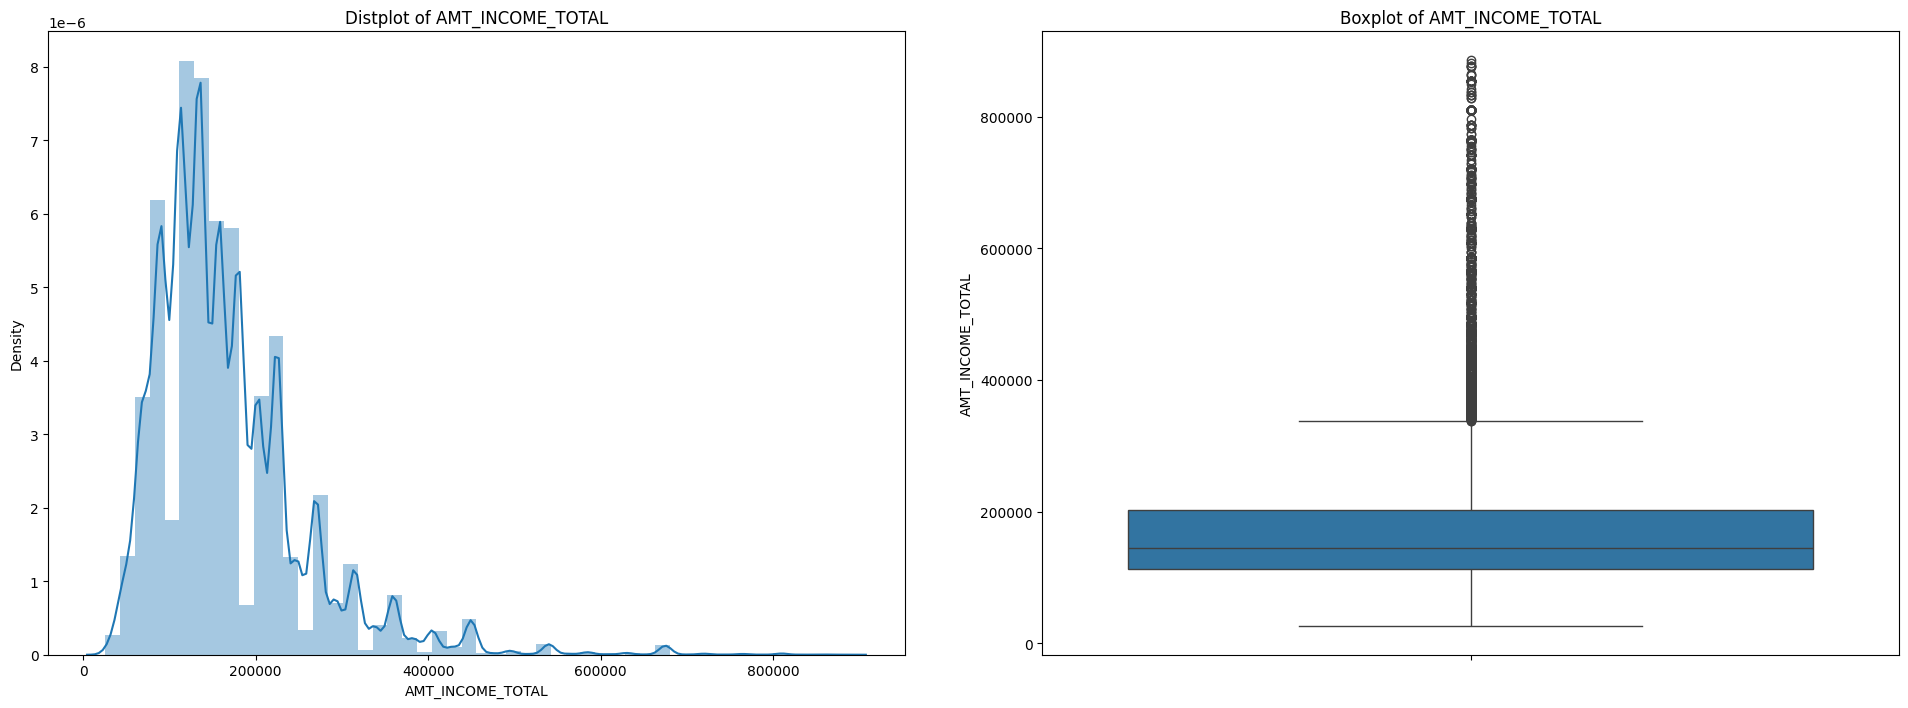

In [142]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Now we can clearly see the distribution and range of the data on both graphs.
- This means that values over 900 thousand UAH in income are clearly outliers.

In [143]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Observations**
- Looking at the data, we see that an income over 900,000 UAH (99.9% of the values) is an outlier.
- Both the distribution chart and the box plot clearly show us the same trend.

**Conclusion**
- Applicants with an income over 900,000 UAH (99.9% of the values) are outliers.

# Emission Analysis

Analyze the emissions of the columns
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

In [144]:
df['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending = False).head()

CNT_FAM_MEMBERS
2.00    158357
1.00     67847
3.00     52601
4.00     24697
5.00      3478
Name: count, dtype: int64

In [145]:
(df['CNT_FAM_MEMBERS'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_FAM_MEMBERS
2.00   51.50
1.00   22.06
3.00   17.11
4.00    8.03
5.00    1.13
Name: proportion, dtype: float64

In [146]:
df['CNT_FAM_MEMBERS'].describe(percentiles = [0.75,0.99,0.999])

count   307509.00
mean         2.15
std          0.91
min          1.00
50%          2.00
75%          3.00
99%          5.00
99.9%        6.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

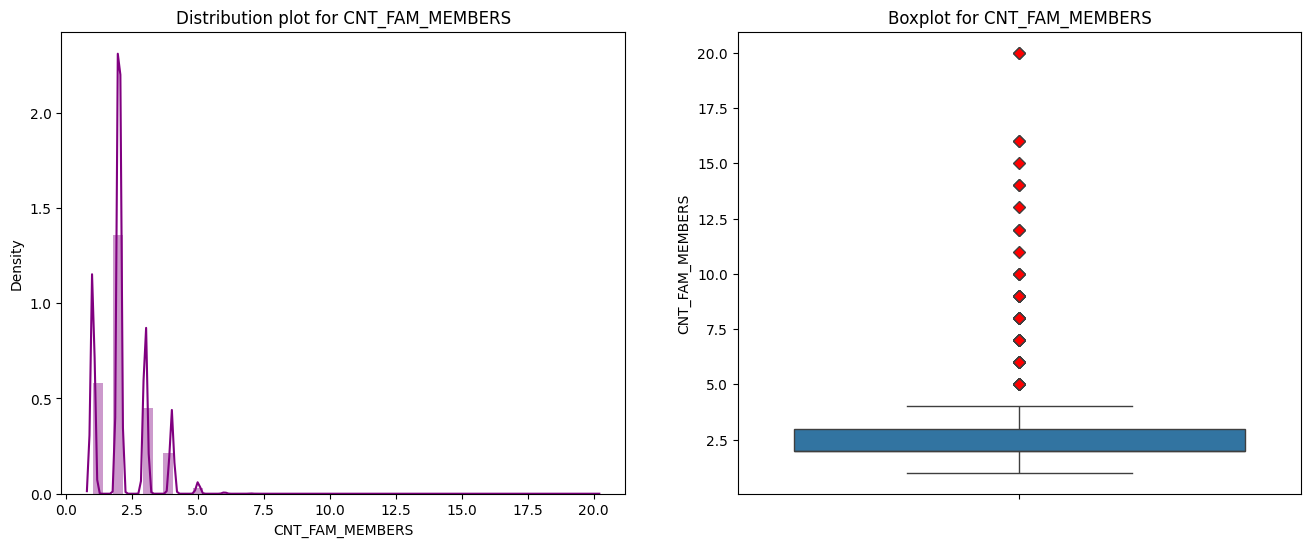

In [147]:
dist_box(df,'CNT_FAM_MEMBERS')

In [148]:
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [149]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value beyond which there are outliers: {}".format(Min_value))
print("Maximum value beyond which there are outliers: {}".format(Max_value))

Minimum value beyond which there are outliers: 0.5
Maximum value beyond which there are outliers: 4.5


In [150]:
df[df['CNT_FAM_MEMBERS'] > 6].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
3079     103596       0         Cash loans           M             0   
3448     104024       0         Cash loans           F             0   
7204     108386       0         Cash loans           M             0   
8254     109622       0         Cash loans           M             1   
9712     111302       1         Cash loans           F             0   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3079                1             7          85500.00   411813.00   
3448                1             5         135000.00   579195.00   
7204                0             6         157500.00   566055.00   
8254                0             5         270000.00   840951.00   
9712                1             5         162000.00   704844.00   

      AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3079     17577.00        355500.00    Unaccompanied  Commercial associate   
3448     24669.00        468000.00  Spouse, partner               Working   
7204     16551.00        472500.00    Unaccompanied               Working   
8254     35761.50        679500.00    Unaccompanied         State servant   
9712     34038.00        630000.00    Unaccompanied               Working   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3079  Secondary / secondary special            Married  House / apartment   
3448                Academic degree            Married  House / apartment   
7204               Higher education            Married  House / apartment   
8254              Incomplete higher            Married  House / apartment   
9712  Secondary / secondary special            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
3079                        0.01       17676           1065   
3448                        0.02       12035           1638   
7204                        0.01       14946           1493   
8254                        0.00       16801           6109   
9712                        0.02       12985            840   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
3079            2527.00             1206           1               1   
3448            4431.00             4466           1               1   
7204            8560.00             4662           1               1   
8254            1927.00              261           1               1   
9712            2128.00             1186           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
3079                0                 1           0           0   
3448                0                 1           0           0   
7204                0                 1           1           0   
8254                0                 1           0           0   
9712                1                 1           0           0   

            OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
3079         Cleaning staff             9.00                     2   
3448         Security staff             7.00                     2   
7204  High skill tech staff             8.00                     2   
8254                Unknown             7.00                     2   
9712  High skill tech staff             7.00                     2   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
3079                            2                     FRIDAY   
3448                            2                   THURSDAY   
7204                            2                    TUESDAY   
8254                            2                     MONDAY   
9712                            2                   SATURDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
3079                        9                           0   
3448                        8                           0   
7204                       

**Observations**
- The number of applicants with more than 5 family members is very minimal.
- From the charts and data, it is clear that if the number of family members is greater than 5, then these are outliers.

**Conclusion**
- Applicants with more than 5 family members are cases that deviate from the norm.

AMT_ANNUITY

In [151]:
df['AMT_ANNUITY'].value_counts().sort_values(ascending = False).head()

AMT_ANNUITY
9000.00     6385
13500.00    5514
6750.00     2279
10125.00    2035
37800.00    1602
Name: count, dtype: int64

In [152]:
(df['AMT_ANNUITY'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_ANNUITY
9000.00    2.08
13500.00   1.79
6750.00    0.74
10125.00   0.66
37800.00   0.52
Name: proportion, dtype: float64

In [153]:
df['AMT_ANNUITY'].describe(percentiles = [0.75,0.99,0.999])

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
50%      24903.00
75%      34596.00
99%      70006.50
99.9%   110047.50
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [154]:
df[df['AMT_ANNUITY'] > 110047].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
485      100559       0         Cash loans           F             1   
1446     101701       0         Cash loans           F             1   
2513     102931       0         Cash loans           F             1   
3228     103767       0         Cash loans           M             1   
3428     104003       0         Cash loans           F             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
485                 1             0         450000.00  2286211.50   
1446                0             1         360000.00  2250000.00   
2513                1             1         292500.00  1409719.50   
3228                1             0         468000.00  2356920.00   
3428                1             1         180000.00  1157670.00   

      AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
485     116266.50       2182500.00    Unaccompanied         State servant   
1446    116505.00       2250000.00    Unaccompanied               Working   
2513    135936.00       1377000.00    Unaccompanied               Working   
3228    119731.50       2250000.00  Spouse, partner  Commercial associate   
3428    112909.50       1125000.00    Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
485                Higher education            Married  House / apartment   
1446  Secondary / secondary special     Civil marriage  House / apartment   
2513  Secondary / secondary special            Married  House / apartment   
3228               Higher education     Civil marriage  House / apartment   
3428               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
485                         0.02       20589          13994   
1446                        0.01       13374           1563   
2513                        0.05       13928           6099   
3228                        0.07        9293            953   
3428                        0.01       10414           1188   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
485             5893.00             4106           1               1   
1446            4890.00             2890           1               1   
2513            7991.00             3163           1               1   
3228            4171.00             1966           1               1   
3428            4880.00             1169           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
485                 0                 1           0           0   
1446                1                 1           1           0   
2513                0                 1           1           0   
3228                0                 1           0           0   
3428                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
485       Core staff             2.00                     2   
1446     Sales staff             3.00                     3   
2513         Unknown             3.00                     1   
3228         Unknown             2.00                     1   
3428      Core staff             3.00                     3   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
485                             2                     MONDAY   
1446                            3                  WEDNESDAY   
2513                            1                     MONDAY   
3228                            1                     MONDAY   
3428                            3                    TUESDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
485                        16                           0   
1446                       12                           0   
2513                       14                           0   
3228    

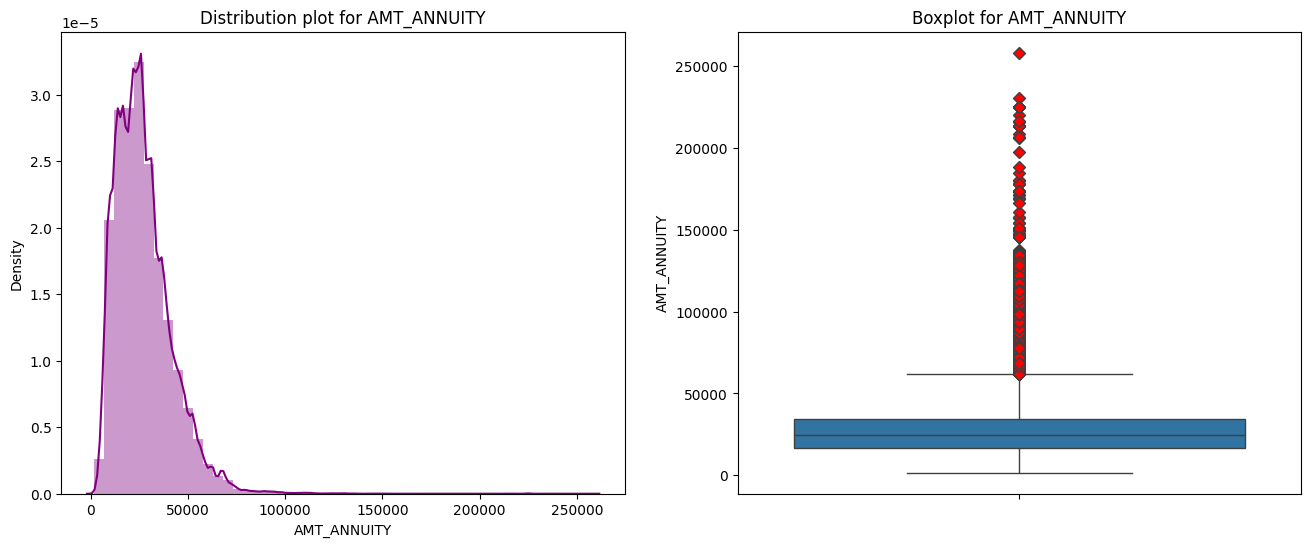

In [155]:
dist_box(df,'AMT_ANNUITY')

In [156]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)  # First quartile
Q3 = df['AMT_ANNUITY'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range
print(IQR)

18072.0


In [157]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value beyond which there are outliers: {}".format(Min_value))
print("Maximum value beyond which there are outliers: {}".format(Max_value))

Minimum value beyond which there are outliers: -10584.0
Maximum value beyond which there are outliers: 61704.0


From the diagrams and data, it is clear that if the value is greater than 61704, then it is emissions. Although the data looks genuine when looking at the size of the loan.

# Binning of continuous columns for analysis

### Categorization of the column `AMT_GOODS_PRICE`

In [158]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [159]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

Let's take a look at the statistical report for `AMT_GOODS_PRICE`.

In [160]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Let's divide the values in `AMT_GOODS_PRICE` into 5 bins and create a new column `AMT_GOODS_PRICE_CATEGORY`.

In [161]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Checking the filling of values according to expectations

In [162]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247251
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Categorization of the `YEARS_BIRTH` column

We will classify `YEARS_BIRTH` instead of `DAYS_BIRTH`, as years are easier to interpret than days.

In [163]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [164]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Let's take a look at the statistical report for `YEARS_BIRTH`

In [165]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Let's categorize the values from `YEARS_BIRTH` into a new column `YEARS_BIRTH_CATEGORY`.

In [166]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)  # Create a new column for age categories based on the YEARS_BIRTH column.

Checking the filling of values according to expectations

In [167]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Categorization of the `YEARS_REGISTRATION` column

We will classify `YEARS_REGISTRATION` instead of `DAYS_REGISTRATION`, as years are easier to interpret than days.

In [168]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [169]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Let's take a look at the statistical report for `YEARS_REGISTRATION`

In [170]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Let's categorize the values from `YEARS_REGISTRATION` into a new column `YEARS_REGISTRATION_CATEGORY`.

In [171]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Checking the filling of values according to expectations

In [172]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Storing updated data with compression

In [173]:
#filename = "drive/MyDrive/Machine Learning for people/data/credit/application_data_processed"
#compression_options = dict(method='zip', archive_name=f'{filename}.csv')
#df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Checking for imbalance in the target column `TARGET`

### Analysis of the `TARGET` column

In [174]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [175]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

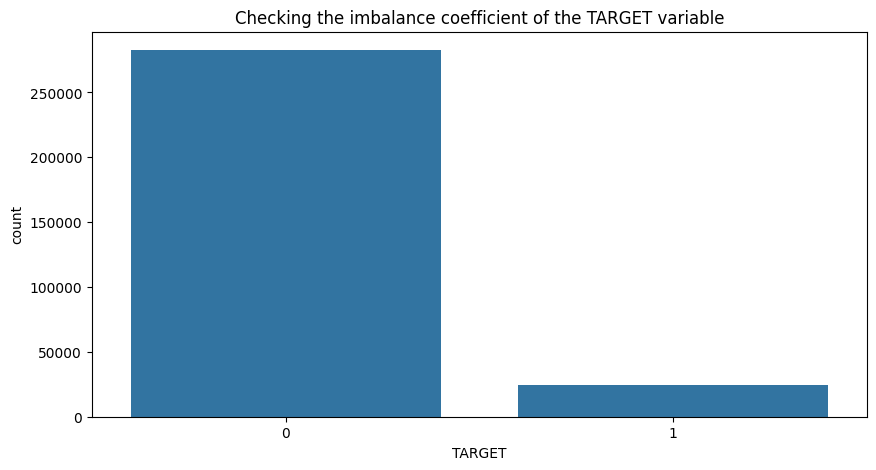

In [176]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Checking the imbalance coefficient of the TARGET variable')
plt.show()

**Observations**

- We have an imbalance in the `TARGET` variable based on the % of observations
 - The value `TARGET` 1 represents a client who is having payment difficulties (a payment delay of more than X days on at least one of the first Y credit payments). This accounts for only 8.07% of the data
 - The value `TARGET` 0 represents all other cases except for 1. This accounts for 91.93% of the data

# Data distribution based on `TARGET`

### Create a new data frame with `TARGET` value 1
- The `TARGET` value 1 represents a customer with payment difficulties (he/she has missed a payment by more than X days on at least one of the first Y payments on the loan). This accounts for only 8.07% of the data.

In [177]:
df1 = df[df['TARGET'] == 1]  # Filter the dataframe for rows where TARGET is 1

In [178]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Create a new data frame with `TARGET` value 0
- The `TARGET` value 0 represents all other cases except 1. This is 91.93% of the data.

In [179]:
df0 = df[df['TARGET'] == 0]

In [180]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Univariate Analysis of Categorical Variables

### Analysis of the `NAME_CONTRACT_TYPE` column

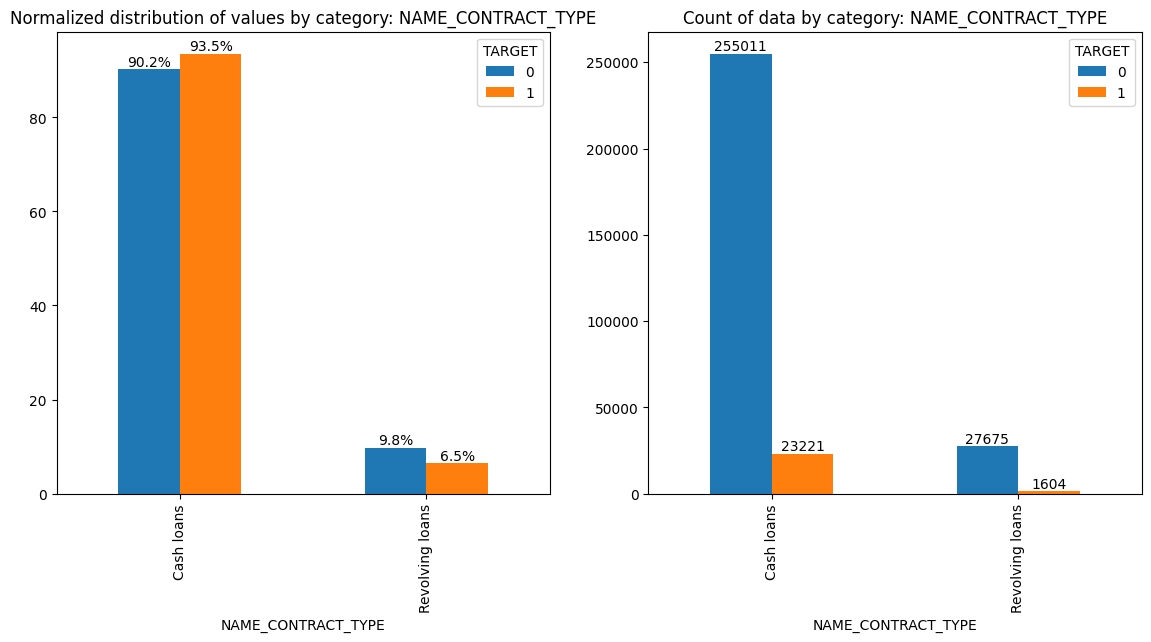

In [181]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Observations**

- Looking at the histograms, we do not see significant differences in `NAME_CONTRACT_TYPE` between clients who have payment difficulties and clients who pay on time.

**Conclusion**
- The column `NAME_CONTRACT_TYPE` does not provide any compelling evidence in favor of clients who have payment difficulties OR pay on time.

# Univariate Analysis of Categorical Column

Analysis of the relationship between the categorical column and the target for the columns
- CODE_GENDER
- FLAG_OWN_CAR

- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS

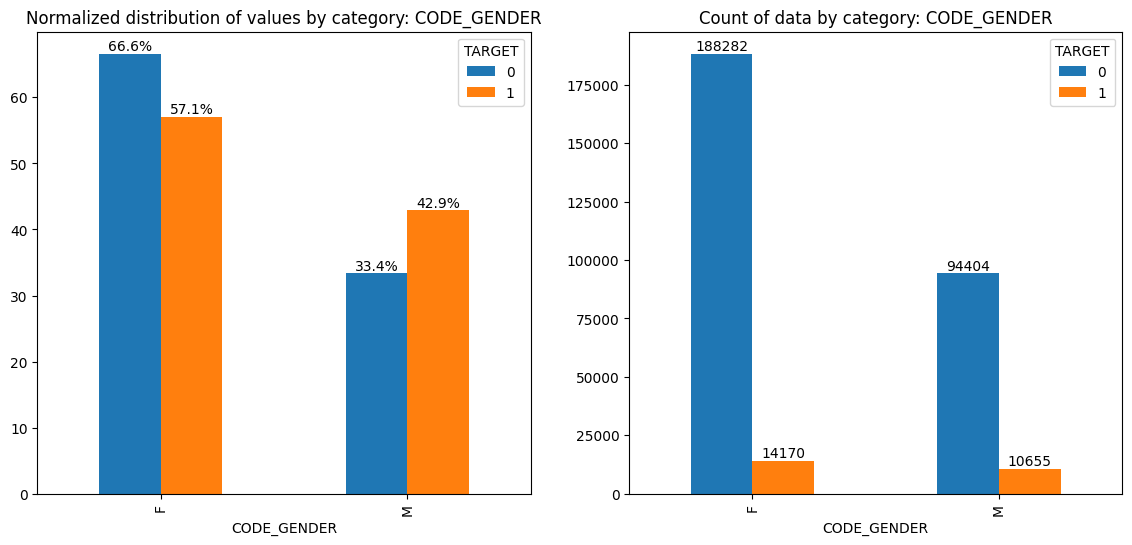

In [182]:
uni_cat_target_compare(df, 'CODE_GENDER') #1 with payment difficulties

- The column `CODE_GENDER` shows that men have slightly more problems with loan repayment than women.

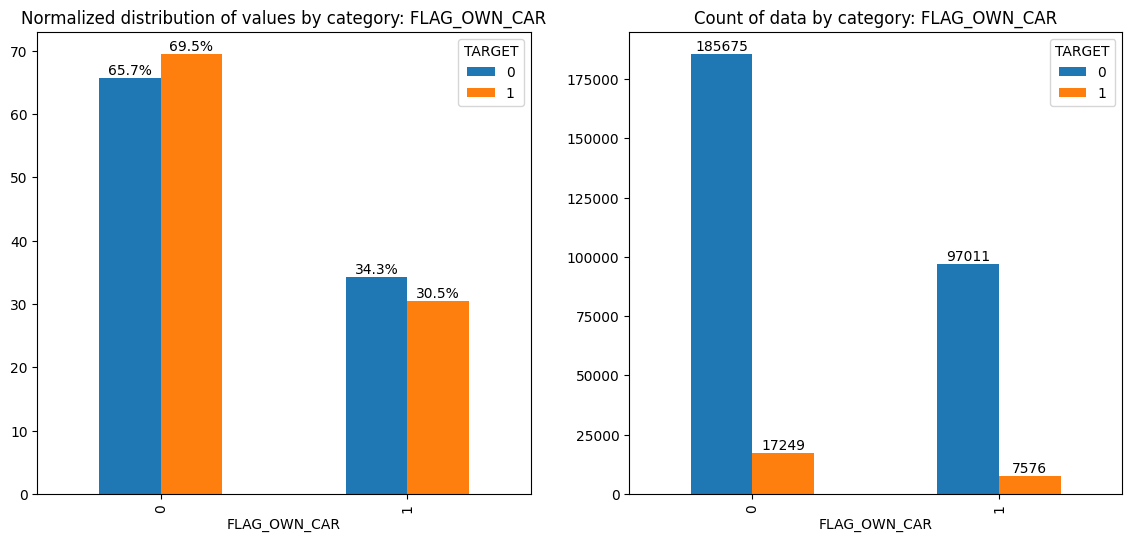

In [183]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

- The column `FLAG_OWN_CAR` shows that clients who do not own a car have slightly more difficulties with payments than those who pay on time.

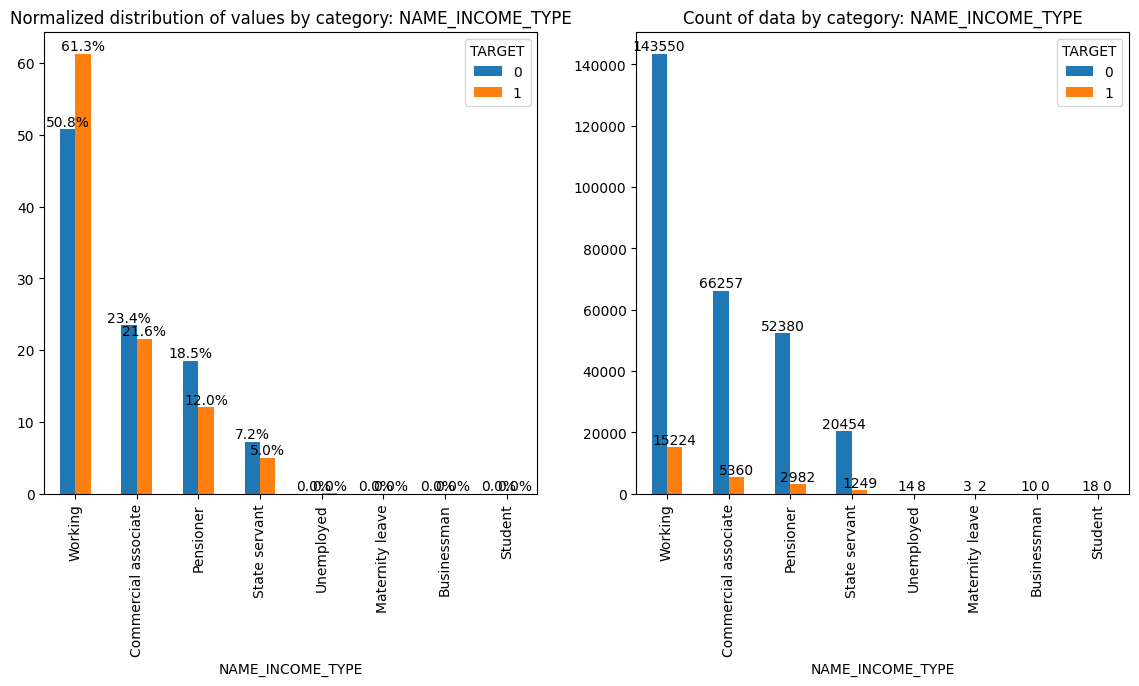

In [184]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

- In `NAME_INCOME_TYPE`, it can be seen that clients who are employed more often have difficulties with payments.

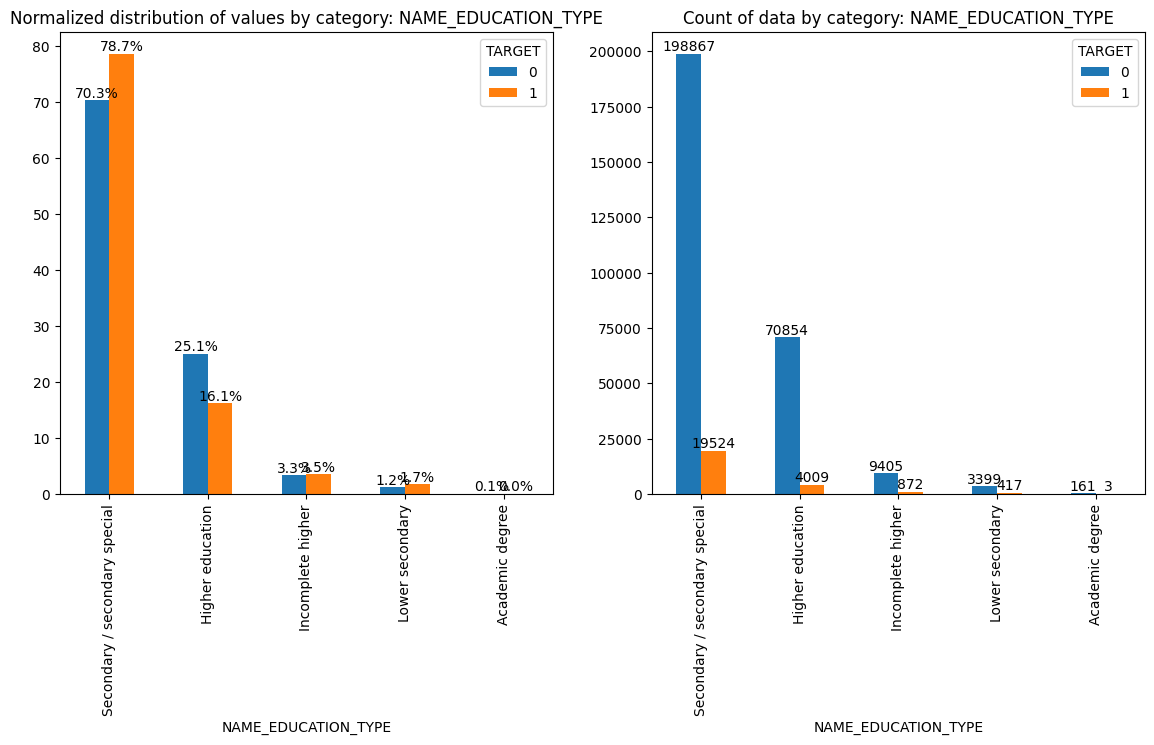

In [185]:
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')

- In `NAME_EDUCATION_TYPE`, clients with secondary education have slightly more difficulties with payments.

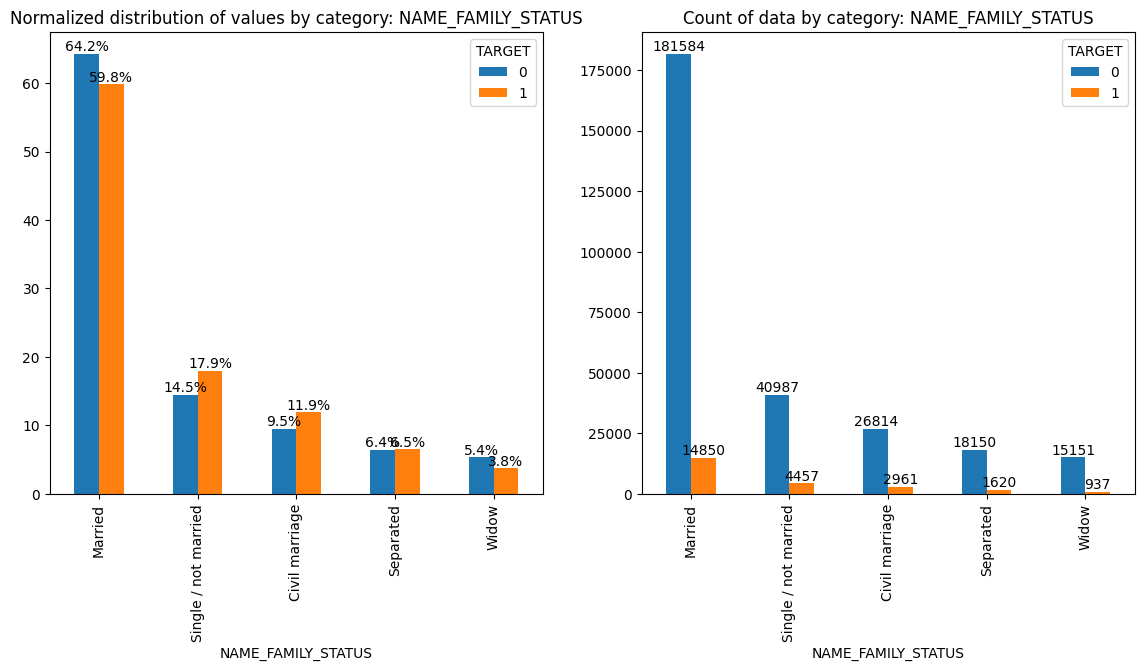

In [186]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

- In `NAME_FAMILY_STATUS`, clients who are single or in a civil partnership have slightly more difficulties with payment.

# Correlation analysis of numerical variables

### Building a Correlation Matrix for Cases with Payment Difficulties

In [187]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 67)

There are 66 numerical columns. Let's create a correlation matrix `corr` for better visualization of the results.

In [188]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()  # Calculate the correlation matrix for numeric columns in df1

In [189]:
corr_df1.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00             0.02          0.07   
FLAG_OWN_REALTY      NaN          0.02             1.00          0.02   
CNT_CHILDREN         NaN          0.07             0.02          1.00   
AMT_INCOME_TOTAL     NaN          0.02             0.01          0.00   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.02        0.10         0.14             0.10   
FLAG_OWN_REALTY               0.01       -0.01         0.00            -0.02   
CNT_CHILDREN                  0.00       -0.00         0.03            -0.01   
AMT_INCOME_TOTAL              1.00        0.04         0.05             0.04   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.03       -0.07          -0.11   
FLAG_OWN_REALTY                         0.03        0.11           0.06   
CNT_CHILDREN                           -0.03       -0.26          -0.19   
AMT_INCOME_TOTAL                        0.01       -0.00          -0.01   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.07             0.02         NaN   
FLAG_OWN_REALTY                0.01            -0.02         NaN   
CNT_CHILDREN                  -0.15             0.03         NaN   
AMT_INCOME_TOTAL              -0.00             0.00         NaN   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.11            -0.02              0.00   
FLAG_OWN_REALTY            -0.06            -0.14             -0.01   
CNT_CHILDREN                0.19             0.05              0.00   
AMT_INCOME_TOTAL            0.01            -0.01             -0.00   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.00        0.03             0.11   
FLAG_OWN_REALTY        -0.05        0.03             0.03   
CNT_CHILDREN           -0.02        0.01             0.89   
AMT_INCOME_TOTAL       -0.00        0.01             0.01   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.01                        -0.01   
FLAG_OWN_REALTY                  -0.01                        -0.01   
CNT_CHILDREN                      0.04                         0.04   
AMT_INCOME_TOTAL                 -0.02                        -0.02   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.12                       -0.05   
CNT_CHILDREN                        -0.02                       -0.02   
AMT_INCOME_TOTAL                     0.01                        0.01   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.02                         0.02   
FLAG_OWN_REALTY                        -0.04                        -0.02   
CNT_CHILDREN                           -0.02                        -0.01   
AMT_INCOME_TOTAL                        0.01                         0.01   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

Let's create a heatmap to view correlations above 80% and 99.99%.

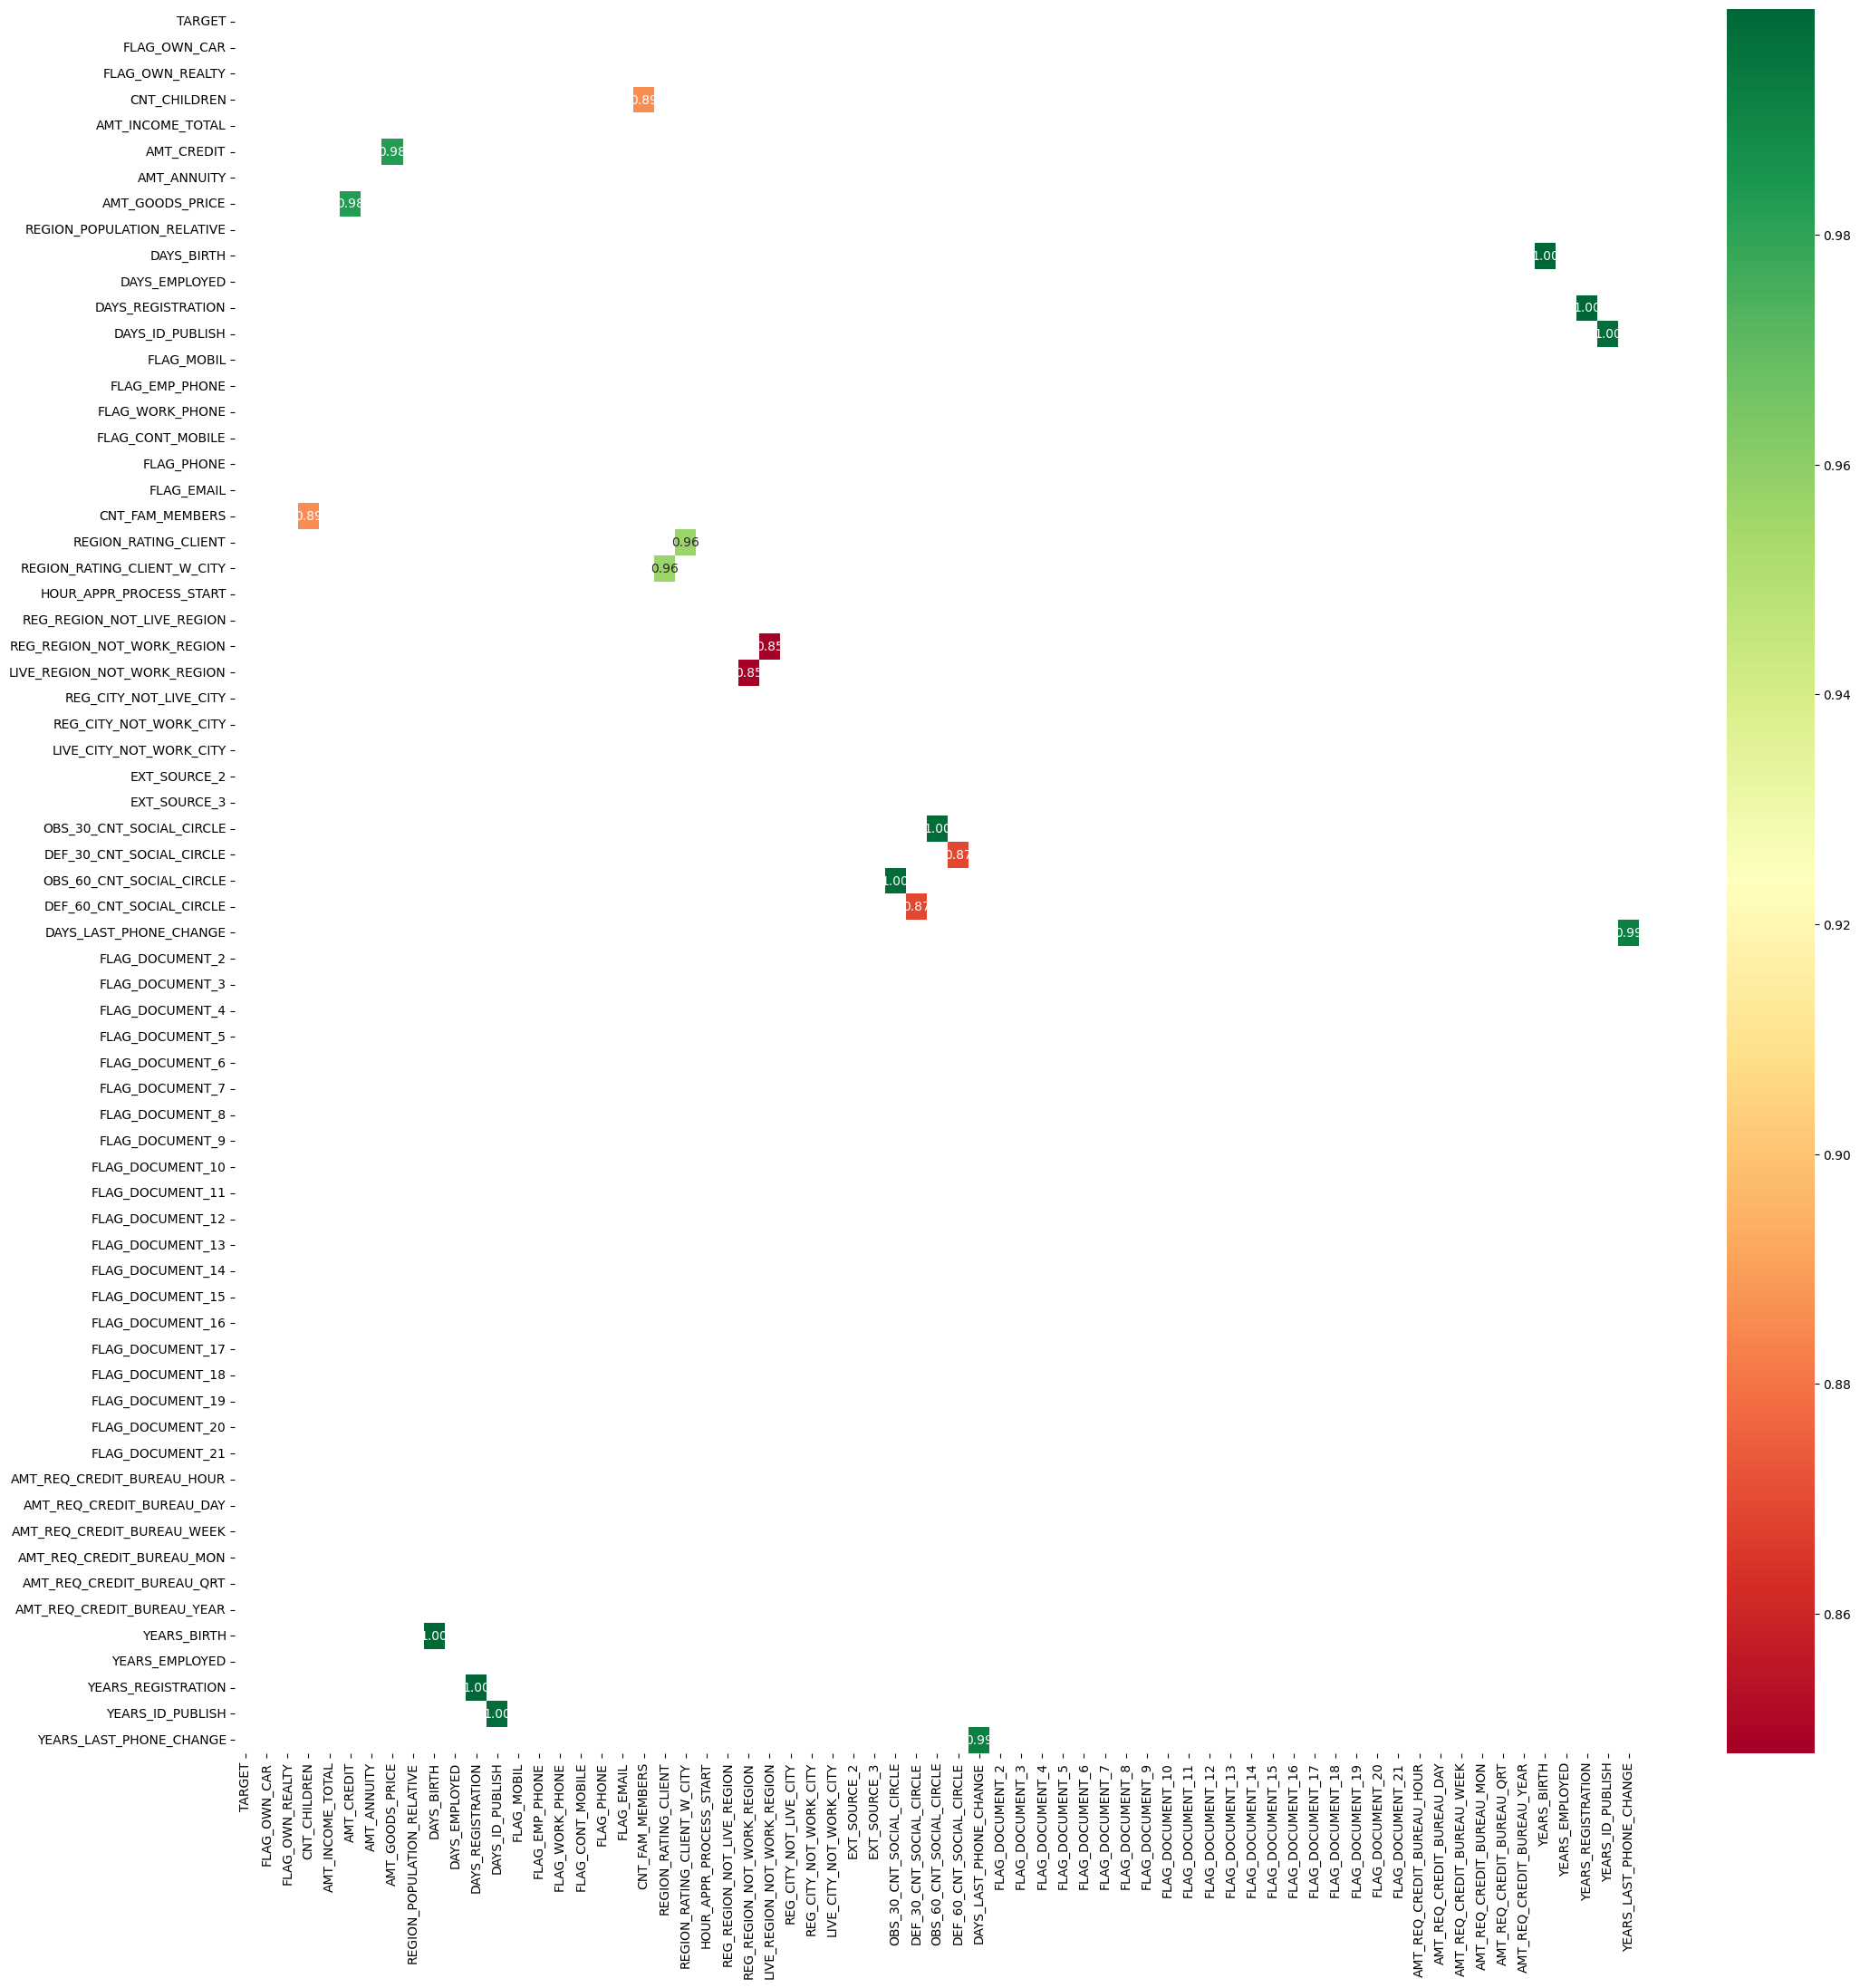

In [190]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Let's take a look at the 10 best correlations for cases with payment difficulties.

In [191]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
                             AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
FLAG_DOCUMENT_6              YEARS_EMPLOYED                0.62
YEARS_EMPLOYED               FLAG_DOCUMENT_6               0.62
DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.62
FLAG_DOCUMENT_6              DAYS_EMPLOYED                 0.62
DAYS_BIRTH                   DAYS_EMPLOYED                 0.58
DAYS_EMPLOYED                DAYS_BIRTH                    0.58
dtype: float64

Since we have repeating combinations, by looking at the table above and removing duplicates, we get the top-10 correlations as shown below:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Building a correlation matrix for cases with timely payments

In [192]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 67)

There are 66 numerical columns. Let's create a correlation matrix `corr` for better visualization of the results.

In [193]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()  # Calculate the correlation matrix for numeric columns in df0

In [194]:
corr_df0.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00            -0.01          0.11   
FLAG_OWN_REALTY      NaN         -0.01             1.00         -0.00   
CNT_CHILDREN         NaN          0.11            -0.00          1.00   
AMT_INCOME_TOTAL     NaN          0.18             0.00          0.03   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.18        0.12         0.14             0.12   
FLAG_OWN_REALTY               0.00       -0.04        -0.01            -0.05   
CNT_CHILDREN                  0.03        0.00         0.02            -0.00   
AMT_INCOME_TOTAL              1.00        0.34         0.42             0.35   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.04       -0.14          -0.16   
FLAG_OWN_REALTY                         0.01        0.12           0.07   
CNT_CHILDREN                           -0.02       -0.34          -0.25   
AMT_INCOME_TOTAL                        0.17       -0.06          -0.14   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.09            -0.02       -0.00   
FLAG_OWN_REALTY                0.03            -0.01       -0.00   
CNT_CHILDREN                  -0.19             0.03        0.00   
AMT_INCOME_TOTAL              -0.06            -0.02        0.00   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.16             0.01             -0.01   
FLAG_OWN_REALTY            -0.07            -0.11              0.01   
CNT_CHILDREN                0.24             0.06             -0.00   
AMT_INCOME_TOTAL            0.14            -0.03             -0.02   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.01        0.03             0.15   
FLAG_OWN_REALTY        -0.04        0.03             0.01   
CNT_CHILDREN           -0.03        0.02             0.88   
AMT_INCOME_TOTAL        0.00        0.08             0.03   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.02                        -0.02   
FLAG_OWN_REALTY                   0.00                         0.00   
CNT_CHILDREN                      0.02                         0.02   
AMT_INCOME_TOTAL                 -0.19                        -0.20   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.10                       -0.03   
CNT_CHILDREN                        -0.01                       -0.01   
AMT_INCOME_TOTAL                     0.08                        0.07   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.04                         0.05   
FLAG_OWN_REALTY                        -0.03                        -0.02   
CNT_CHILDREN                            0.01                         0.02   
AMT_INCOME_TOTAL                        0.14                         0.13   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

Let's create a heatmap to view correlations above 80% and 99.99%.

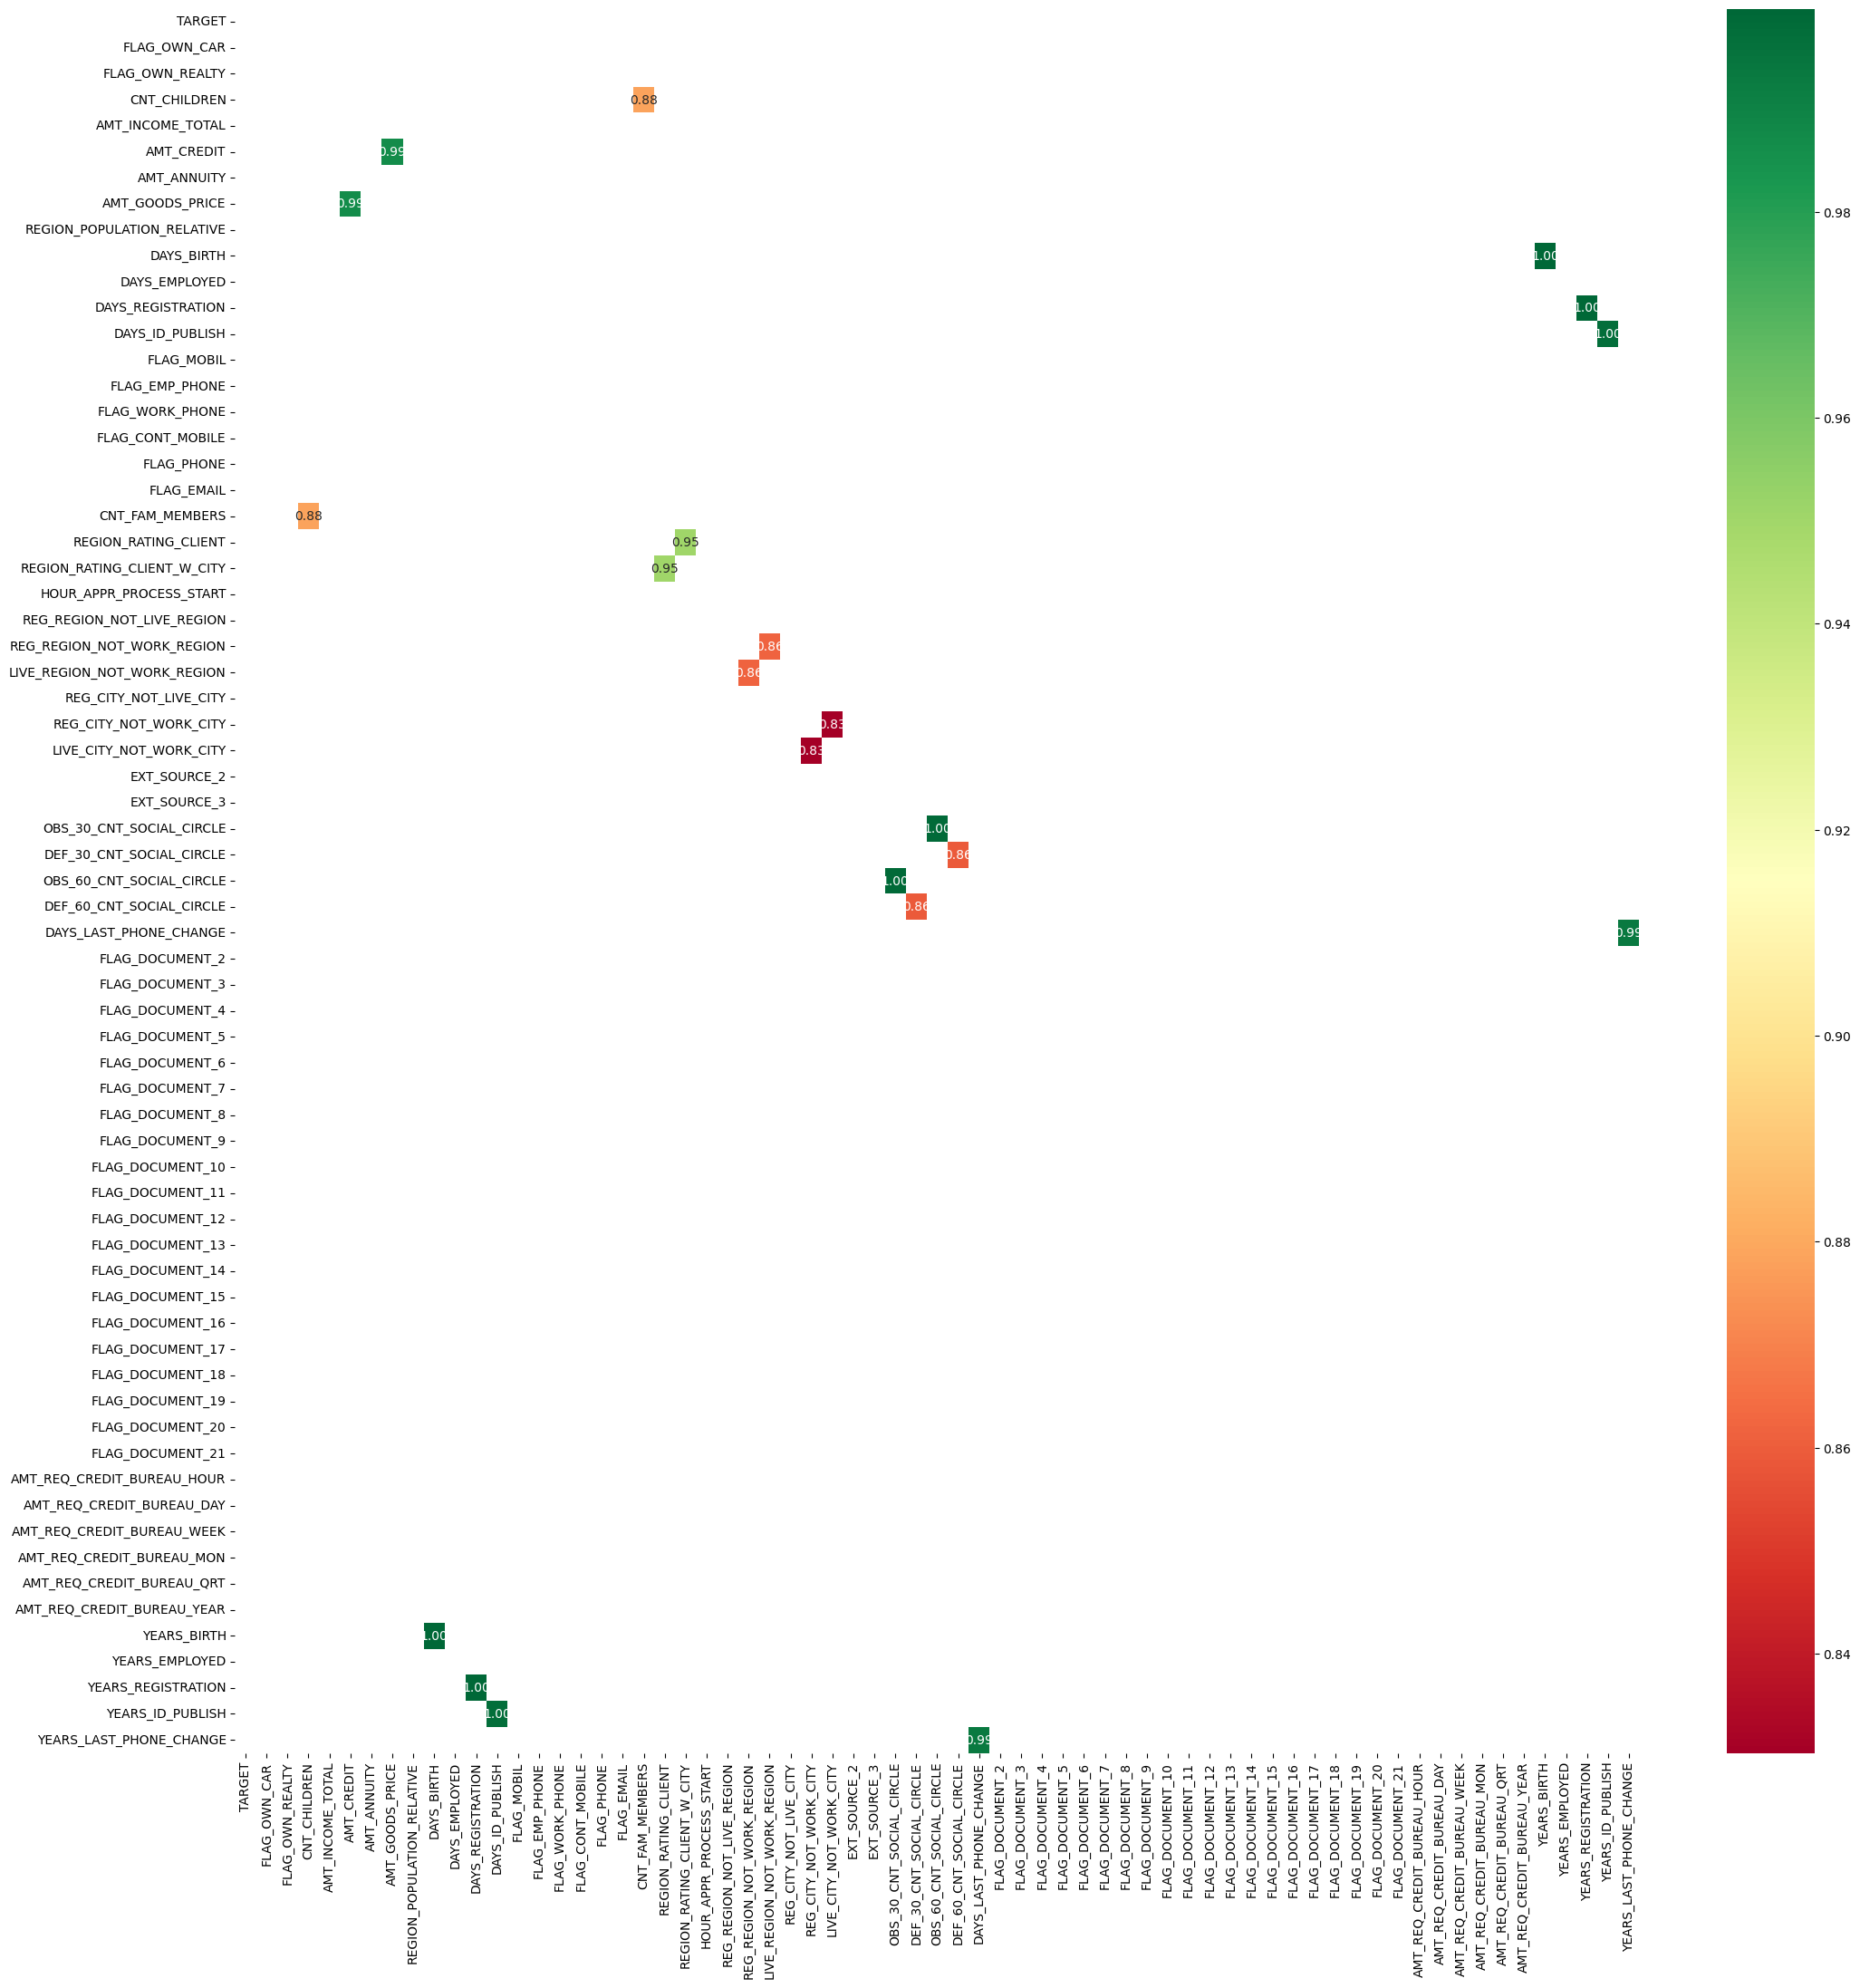

In [195]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Let's take a look at the 10 best correlations for timely payments.

In [196]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_GOODS_PRICE              AMT_CREDIT                    0.99
AMT_CREDIT                   AMT_GOODS_PRICE               0.99
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
                             AMT_CREDIT                    0.77
AMT_CREDIT                   AMT_ANNUITY                   0.77
DAYS_EMPLOYED                DAYS_BIRTH                    0.63
DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
                             YEARS_EMPLOYED                0.63
YEARS_EMPLOYED               DAYS_BIRTH                    0.63
DAYS_EMPLOYED                YEARS_BIRTH                   0.63
YEARS_BIRTH                  DAYS_EMPLOYED                 0.63
                             YEARS_EMPLOYED                0.63
YEARS_EMPLOYED               YEARS_BIRTH                   0.63
FLAG_DOCUMENT_6              YEARS_EMPLOYED                0.60
YEARS_EMPLOYED               FLAG_DOCUMENT_6               0.60
DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60
FLAG_DOCUMENT_6              DAYS_EMPLOYED                 0.60
dtype: float64

Since we have repeating combinations, by looking at the table above and removing duplicates, we get the top-10 correlations as shown below:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Let's compare the 10 best correlations between cases with payment difficulties and timely payments.

**Observations**

- The top 10 correlations for Payment Difficulties and Timely Payments are the same, except for minor differences in the percentage of correlation.
- The highest correlation is for the combination of `AMT_GOODS_PRICE` and `AMT_CREDIT`.
- For the "Payment Difficulties" dataset, the correlation between `AMT_GOODS_PRICE` and `AMT_CREDIT` is 0.98.
- For the "Timely Payments" dataset, the correlation between `AMT_GOODS_PRICE` and `AMT_CREDIT` is 0.99.

# Univariate Analysis of Numerical Variables

### Analysis of the `AMT_CREDIT` Column

#### Searching for outliers in `AMT_CREDIT` in cases of payment difficulties

Calculation of IQR (Inter Quartile Range)

In [197]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)  # First quartile
Q3 = df1['AMT_CREDIT'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range
print(IQR)

448915.5


The values *before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers.

In [198]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Minimum value beyond which there are outliers: {}".format(Min_value1))
print("Maximum value beyond which there are outliers: {}".format(Max_value1))

Minimum value beyond which there are outliers: -388973.25
Maximum value beyond which there are outliers: 1406688.75


#### Search for outliers in `AMT_CREDIT` for cases with timely payments

Calculation of IQR (Inter Quartile Range)

In [199]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


The values *before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers.

In [200]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Minimum value beyond which there are outliers: {}".format(Min_value0))
print("Maximum value beyond which there are outliers: {}".format(Max_value0))

Minimum value beyond which there are outliers: -540000.0
Maximum value beyond which there are outliers: 1620000.0


Removal of outliers and building a distribution chart

In [201]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

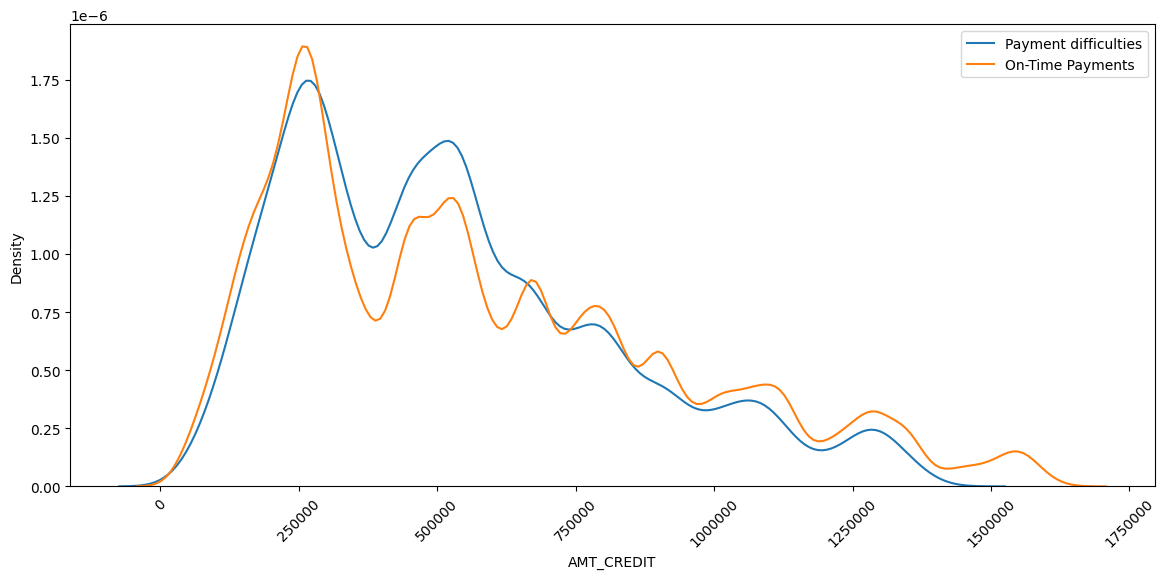

In [202]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Observations**

- For `AMT_CREDIT` from 250000 to approximately 650000, more clients have payment difficulties.
- For `AMT_CREDIT` > 750000, more clients make timely payments.

# Univariate Analysis of Numeric Column

Univariate analysis (detection of outliers, their removal, and construction of KDE plot) for numeric variables
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

In [203]:
def outlier_analysis(df0, df1, col_name):

  print(f"{col_name} with payment difficulties")
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.75)
  IQR = Q3 - Q1
  print(IQR)

  Min_value1 = (Q1 - 1.5 * IQR)
  Max_value1 = (Q3 + 1.5 * IQR)
  print("Minimum value, below which there are outliers: {}".format(Min_value1))
  print("Maximum value, above which there are outliers: {}".format(Max_value1))

  print(f"\n{col_name} with on-time payments")
  Q1 = df0[col_name].quantile(0.25)
  Q3 = df0[col_name].quantile(0.75)
  IQR = Q3 - Q1
  print(IQR)

  Min_value2 = (Q1 - 1.5 * IQR)
  Max_value2 = (Q3 + 1.5 * IQR)
  print("Minimum value, below which there are outliers: {}".format(Min_value2))
  print("Maximum value, above which there are outliers: {}".format(Max_value2))

  return Max_value1, Max_value2

def kde_no_outliers(df0, df1, Max_value1, Max_value2, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value2][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

def one_d_num_analysis2(df0, df1, col_name):
  Max_value1, Max_value2 = outlier_analysis(df0, df1, col_name)
  print("\nRemoving outliers and constructing the distribution chart")
  kde_no_outliers(df0, df1, Max_value1, Max_value2, col_name)

YEARS_BIRTH with payment difficulties
18.0
Minimum value, below which there are outliers: 4.0
Maximum value, above which there are outliers: 76.0

YEARS_BIRTH with on-time payments
20.0
Minimum value, below which there are outliers: 4.0
Maximum value, above which there are outliers: 84.0

Removing outliers and constructing the distribution chart


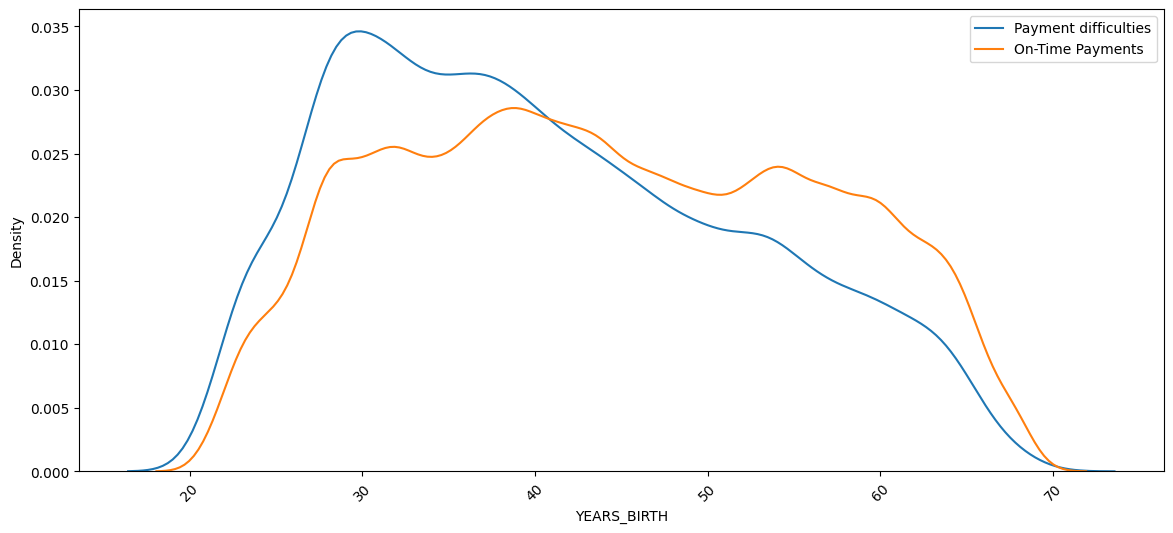

In [204]:
one_d_num_analysis2(df0, df1, 'YEARS_BIRTH')

- For `YEARS_BIRTH`, clients aged 25 to 40 have more difficulties with payments.
- For `YEARS_BIRTH`, after 40 there are more clients who make payments on time.

AMT_GOODS_PRICE with payment difficulties
436500.0
Minimum value, below which there are outliers: -416250.0
Maximum value, above which there are outliers: 1329750.0

AMT_GOODS_PRICE with on-time payments
446502.375
Minimum value, below which there are outliers: -431253.5625
Maximum value, above which there are outliers: 1354755.9375

Removing outliers and constructing the distribution chart


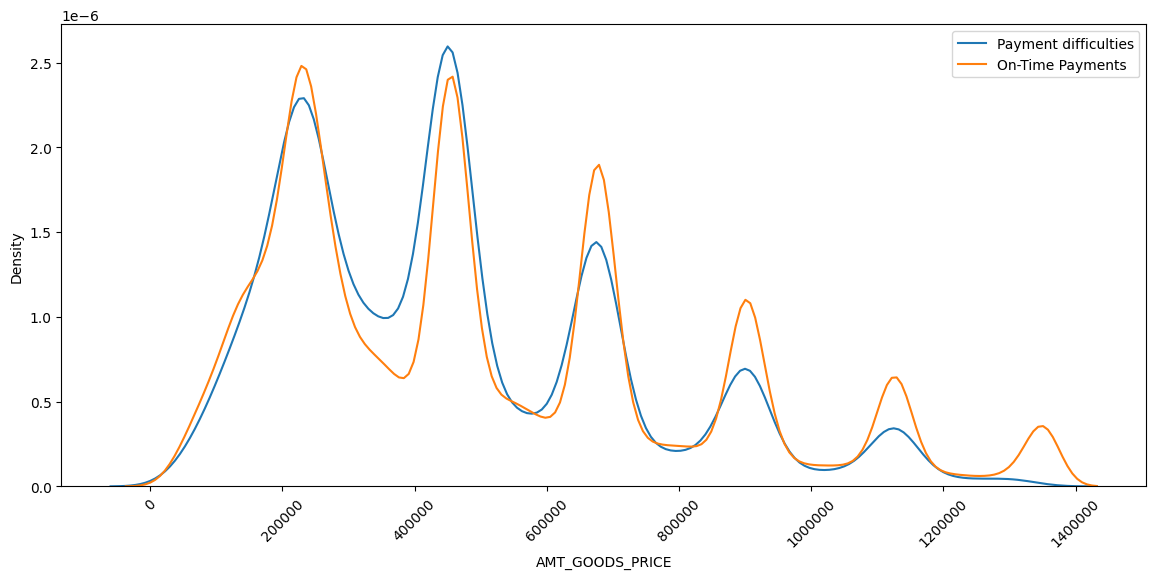

In [205]:
one_d_num_analysis2(df0, df1, 'AMT_GOODS_PRICE')

- For `AMT_GOODS_PRICE` after the value of 300,000 and up to 500,000, the number of clients who have payment difficulties is higher.
- For `AMT_GOODS_PRICE` > 650,000, most clients make their payments on time.

DAYS_EMPLOYED with payment difficulties
2603.0
Minimum value, below which there are outliers: -3227.5
Maximum value, above which there are outliers: 7184.5

DAYS_EMPLOYED with on-time payments
5107.0
Minimum value, below which there are outliers: -6693.5
Maximum value, above which there are outliers: 13734.5

Removing outliers and constructing the distribution chart


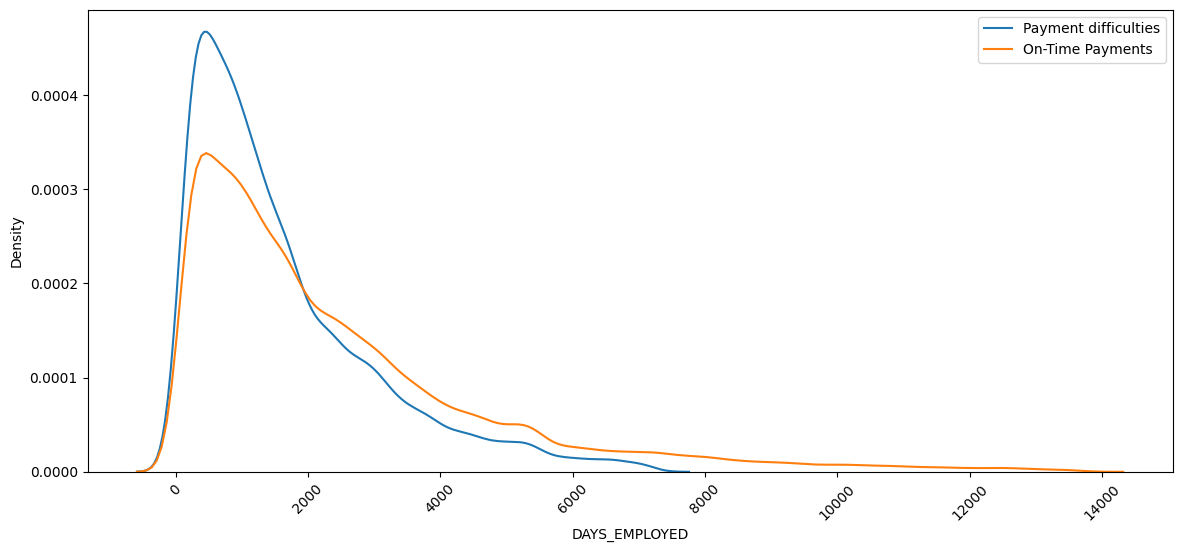

In [206]:
one_d_num_analysis2(df0, df1, 'DAYS_EMPLOYED')

- For `DAYS_EMPLOYED`, clients who have worked < 2000 days have difficulties with payments.
- For `DAYS_EMPLOYED`, clients who have worked > 2000 make payments on time.

CNT_CHILDREN with payment difficulties
1.0
Minimum value, below which there are outliers: -1.5
Maximum value, above which there are outliers: 2.5

CNT_CHILDREN with on-time payments
1.0
Minimum value, below which there are outliers: -1.5
Maximum value, above which there are outliers: 2.5

Removing outliers and constructing the distribution chart


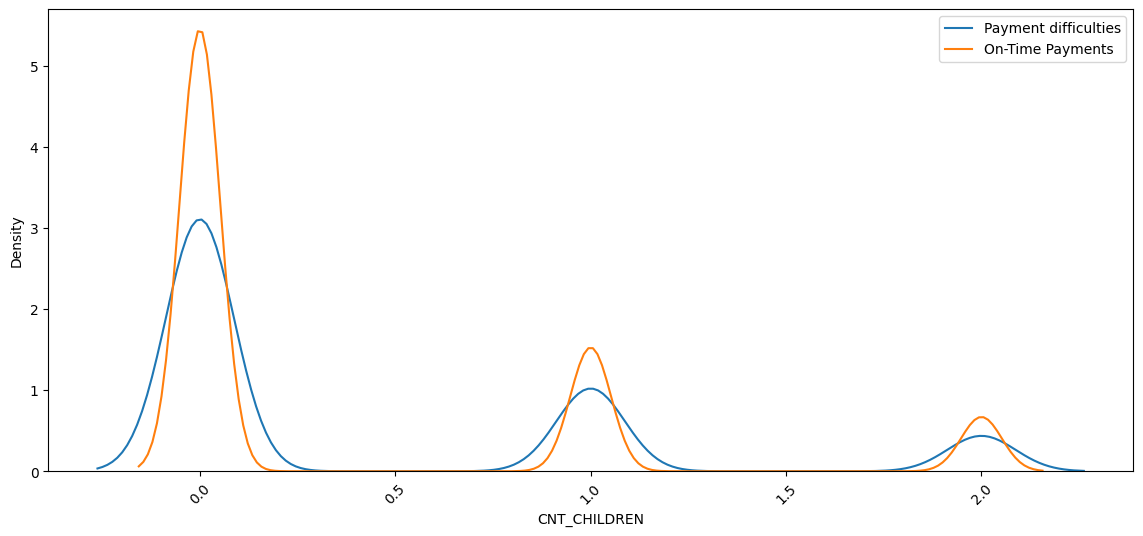

In [207]:
one_d_num_analysis2(df0, df1, 'CNT_CHILDREN')

- For `CNT_CHILDREN`, overall the presence of children in clients does not change their solvency, but clients without children make payments much more often.

AMT_INCOME_TOTAL with payment difficulties
90000.0
Minimum value, below which there are outliers: -22500.0
Maximum value, above which there are outliers: 337500.0

AMT_INCOME_TOTAL with on-time payments
90000.0
Minimum value, below which there are outliers: -22500.0
Maximum value, above which there are outliers: 337500.0

Removing outliers and constructing the distribution chart


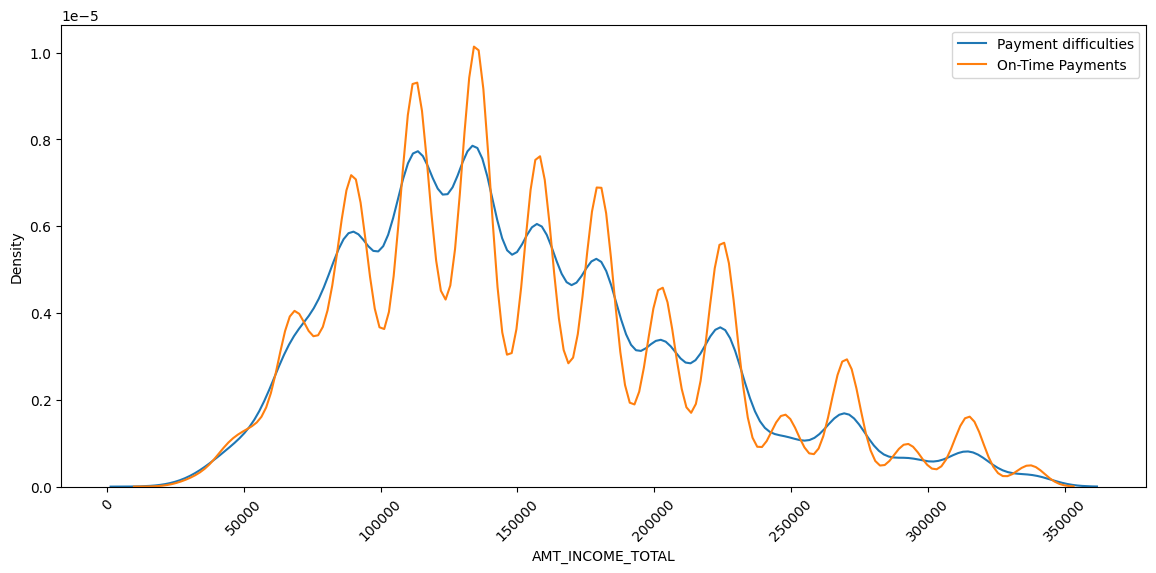

In [208]:
one_d_num_analysis2(df0, df1, 'AMT_INCOME_TOTAL')

- For `AMT_INCOME_TOTAL`, the graph shows stronger fluctuations where clients make payments on time, and it can be said that the data is approximately equal for those who have payment difficulties and those who make payments on time.

# Two-Dimensional/Multidimensional Analysis

## Continuous vs discrete variables

### Analysis of the column `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Search for outliers in the column `AMT_GOODS_PRICE` for the group with payment difficulties**

In [209]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1329750.0

**Search for outliers for the column `AMT_CREDIT` for the group with payment difficulties**

In [210]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Search for outliers for `AMT_GOODS_PRICE` for the group with timely payments**

In [211]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1354755.9375

**Searching for outliers for `AMT_CREDIT` for the group with timely payments**

In [212]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Building a scatter plot to compare with removed outliers.

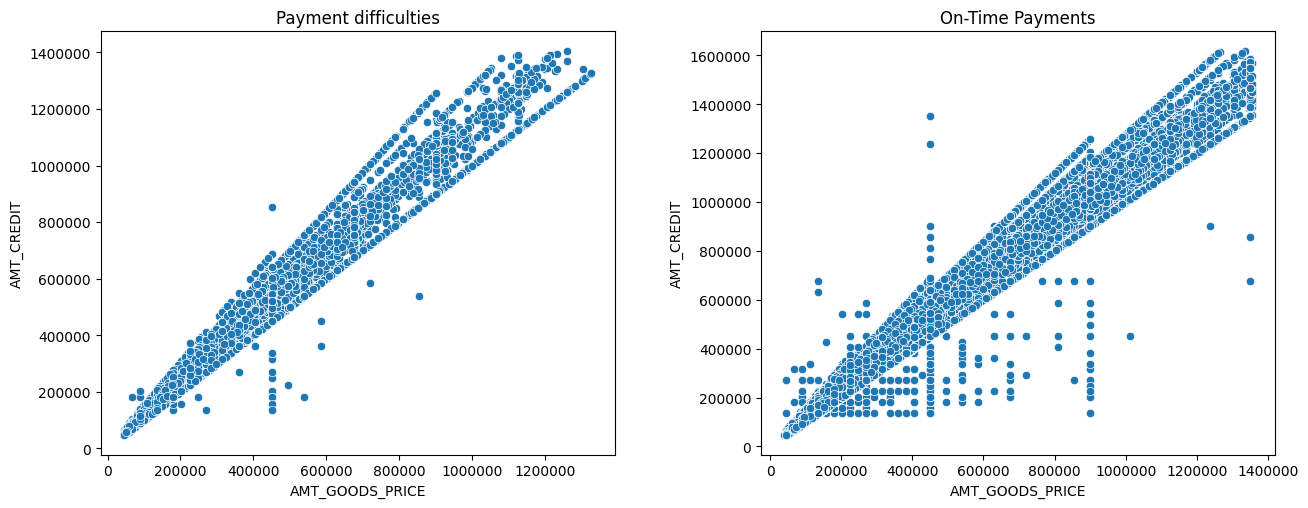

In [213]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Observations**
- AMT_GOODS_PRICE and AMT_CREDIT have a strong positive correlation. This means that as the price of the goods increases, the amount of credit also increases.

# Correlation analysis for a pair of numerical variables

Correlation analysis for pairs of variables
- AMT_ANNUITY and AMT_CREDIT

- DAYS_EMPLOYED and AMT_INCOME_TOTAL
- AMT_CREDIT and DAYS_BIRTH

In [214]:
def corr_func_num(df0, df1, col_name1, col_name2):
  print(f"Searching for outliers for column {col_name1} for the group with payment difficulties")
  max_value1_col1 = outlier_range(df1, col_name1)
  print(max_value1_col1)
  print(f"Searching for outliers for column {col_name2} for the group with payment difficulties")
  max_value1_col2 = outlier_range(df1, col_name2)
  print(max_value1_col2)
  print(f"Searching for outliers for {col_name1} for the group with on-time payments")
  max_value0_col1 = outlier_range(df0, col_name1)
  print(max_value0_col1)
  print(f"Searching for outliers for {col_name2} for the group with on-time payments")
  max_value0_col2 = outlier_range(df0, col_name2)
  print(max_value0_col2)

  print(f"\nBuilding a scatter plot for comparison with removed outliers")
  plt.figure(figsize = (14, 6))

  plt.subplot(1,2,1)
  plt.title('Payment difficulties')
  sns.scatterplot(x = df1[df1[col_name1] < max_value1_col1][col_name1],
                y = df1[df1[col_name2] < max_value1_col2][col_name2], data = df1)
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')

  plt.subplot(1,2,2)
  plt.title('On-Time Payments')
  sns.scatterplot(x = df0[df0[col_name1] < max_value0_col1][col_name1],
                y = df0[df0[col_name2] < max_value0_col2][col_name2], data = df0)
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')

  plt.tight_layout(pad = 4)
  plt.show()

Searching for outliers for column AMT_ANNUITY for the group with payment difficulties
56398.5
Searching for outliers for column AMT_CREDIT for the group with payment difficulties
1406688.75
Searching for outliers for AMT_ANNUITY for the group with on-time payments
62187.75
Searching for outliers for AMT_CREDIT for the group with on-time payments
1620000.0

Building a scatter plot for comparison with removed outliers


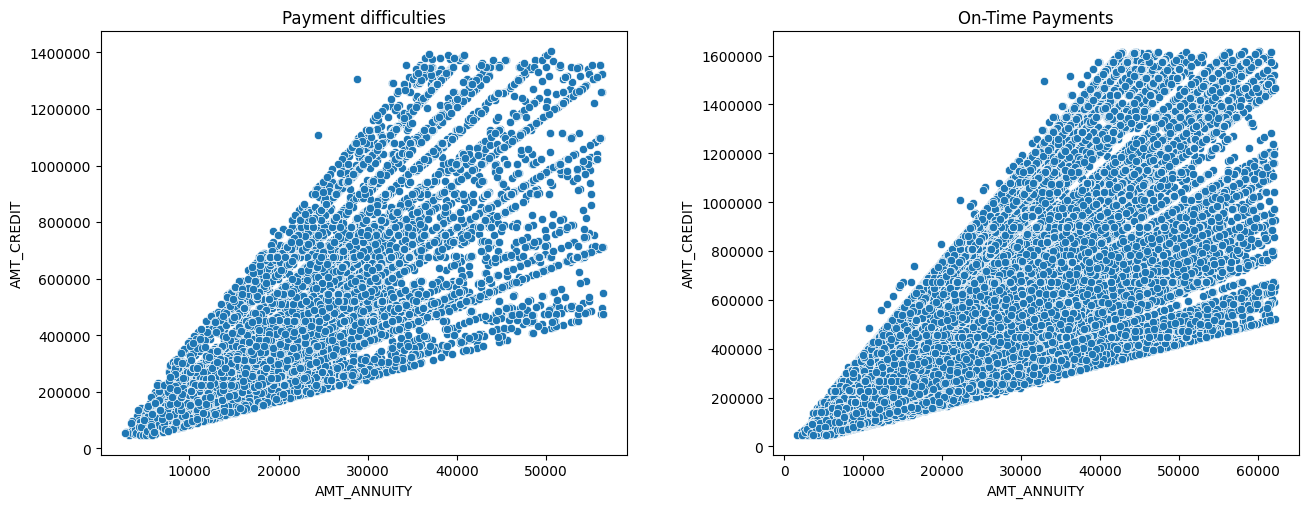

In [215]:
corr_func_num(df0, df1, 'AMT_ANNUITY', 'AMT_CREDIT')

- AMT_ANNUITY and AMT_CREDIT have a strong positive correlation. This means that as the credit amount increases, the annual payment amount also increases.

In [216]:
correlation = df[['AMT_ANNUITY', 'AMT_CREDIT']].corr()
print(correlation)

             AMT_ANNUITY  AMT_CREDIT
AMT_ANNUITY         1.00        0.77
AMT_CREDIT          0.77        1.00


Searching for outliers for column DAYS_EMPLOYED for the group with payment difficulties
7184.5
Searching for outliers for column AMT_INCOME_TOTAL for the group with payment difficulties
337500.0
Searching for outliers for DAYS_EMPLOYED for the group with on-time payments
13734.5
Searching for outliers for AMT_INCOME_TOTAL for the group with on-time payments
337500.0

Building a scatter plot for comparison with removed outliers


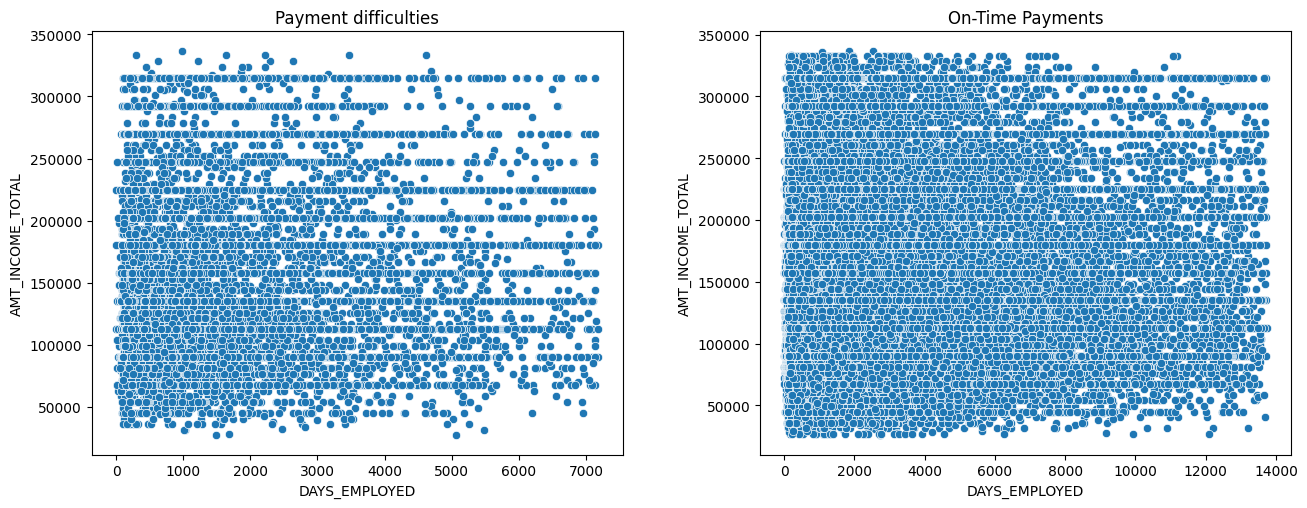

In [217]:
corr_func_num(df0, df1, 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

- For DAYS_EMPLOYED and AMT_INCOME_TOTAL, there is a weak correlation between the number of days employed and total income, so the duration of employment does not significantly affect a person's income.

In [218]:
correlation = df[['DAYS_EMPLOYED', 'AMT_INCOME_TOTAL']].corr()
print(correlation)

                  DAYS_EMPLOYED  AMT_INCOME_TOTAL
DAYS_EMPLOYED              1.00             -0.06
AMT_INCOME_TOTAL          -0.06              1.00


Searching for outliers for column AMT_CREDIT for the group with payment difficulties
1406688.75
Searching for outliers for column DAYS_BIRTH for the group with payment difficulties
27998.5
Searching for outliers for AMT_CREDIT for the group with on-time payments
1620000.0
Searching for outliers for DAYS_BIRTH for the group with on-time payments
30680.375

Building a scatter plot for comparison with removed outliers


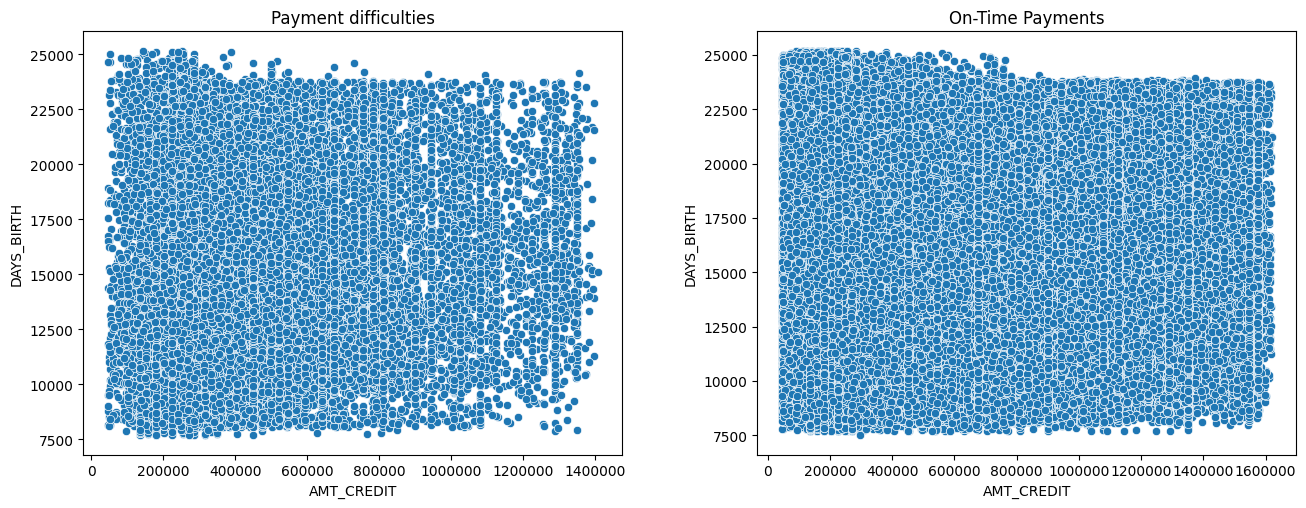

In [219]:
corr_func_num(df0, df1, 'AMT_CREDIT', 'DAYS_BIRTH')

- For AMT_CREDIT and DAYS_BIRTH, there is a very weak correlation between the loan amount and age, so the loan amount does not depend on age.

In [220]:
correlation = df[['AMT_CREDIT', 'DAYS_BIRTH']].corr()
print(correlation)

            AMT_CREDIT  DAYS_BIRTH
AMT_CREDIT        1.00        0.06
DAYS_BIRTH        0.06        1.00


## Continuous and Categorical Variables

In [221]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Draws a box plot for the given DataFrame, categorical and continuous variable.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Creates parallel box plots for two groups defined in the dataset, based on
    categorical and continuous variable, highlighting differences using shades.
    """
    plt.figure(figsize=(16, 10))

    # Plot for the first group "Payment Difficulties"
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Plot for the second group "On-Time Payments"
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Analysis of columns `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Search for outliers for `AMT_CREDIT` for the group with payment difficulties**

In [222]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Searching for outliers for `AMT_CREDIT` for the group with timely payments**

In [223]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Client with payment difficulties**

In [224]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Client with timely payments**

In [225]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

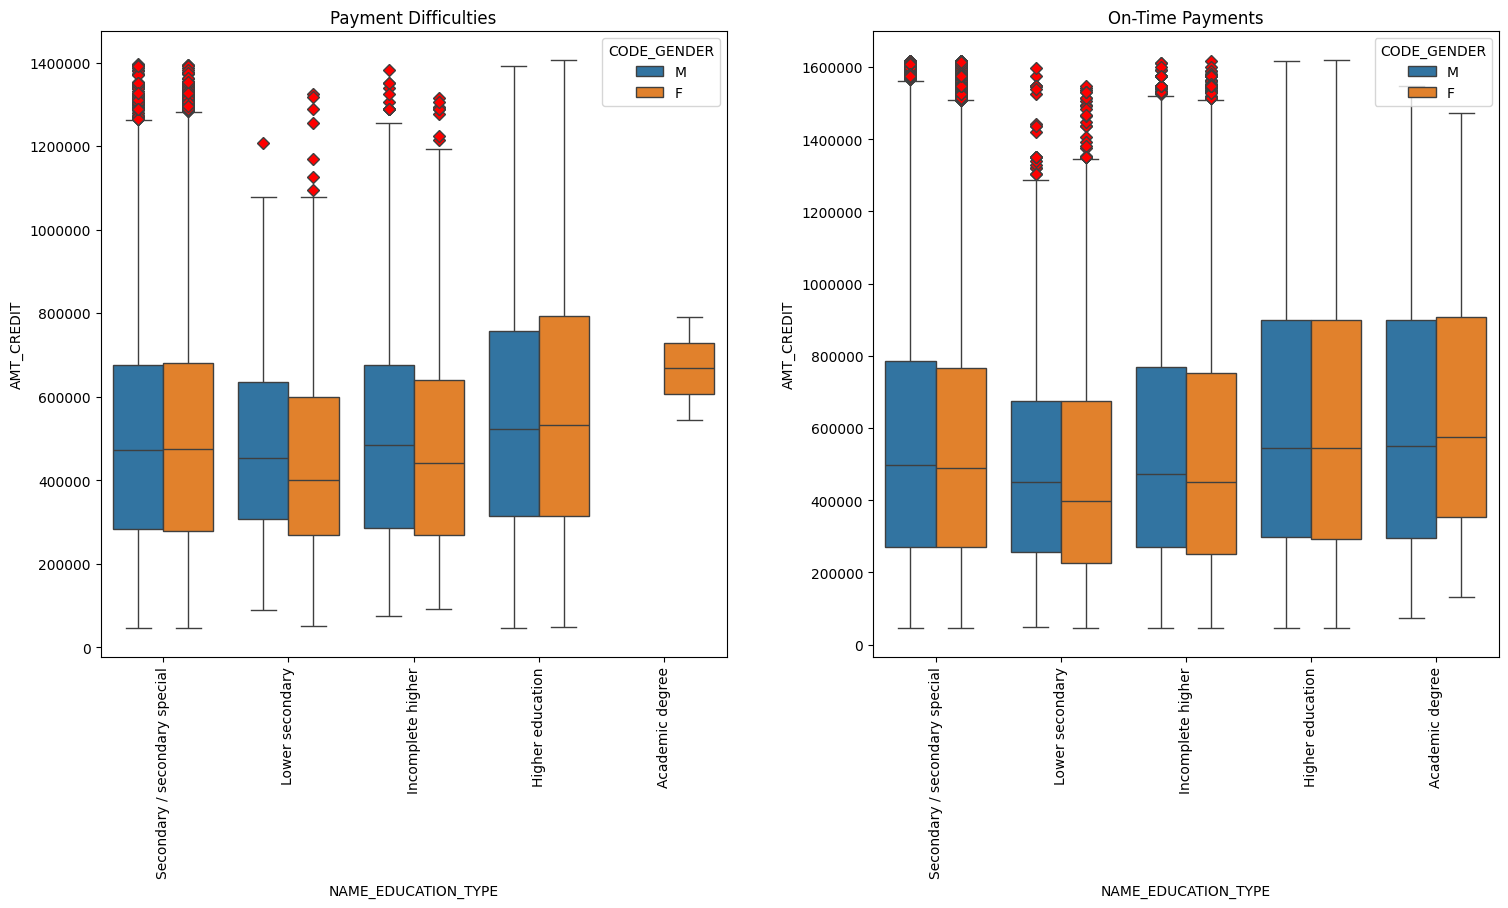

In [226]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Observations
- Clients with an "academic degree" have a wide range of credits for timely payments, while for clients with payment issues, this range is significantly lower.
- Looking at the aggregated statistics, clients with "higher education" and payment issues take out an average and median credit in a significantly larger range than clients with timely payments.
- Male clients with "higher education" always pay their credit on time.

# Correlation analysis between two categorical variables and a numerical one

Correlation analysis for triples of variables

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

In [227]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):


  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

# Client with payment difficulties
  print("Клієнт з платіжними труднощами")

  display(df1.groupby(by = [column_2, column_3])[column_1].describe().head())

# Client with timely payments
  print("Клієнт зі своєчасними платежами")

  display(df0.groupby(by = [column_2, column_3])[column_1].describe().head())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

Клієнт з платіжними труднощами


count      mean        std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                         
Civil marriage     F           1753.00 153620.72  101045.86 25650.00   
                   M           1208.00 173949.99   92449.17 36000.00   
Married            F           8324.00 159907.85 1283283.40 27000.00   
                   M           6526.00 182233.06   94787.77 31500.00   
Separated          F           1045.00 161159.55   82633.33 36000.00   

                                     25%       50%       75%          max  
NAME_FAMILY_STATUS CODE_GENDER                                             
Civil marriage     F           108000.00 135000.00 180000.00   3150000.00  
                   M           117000.00 157500.00 202500.00   1350000.00  
Married            F            90000.00 135000.00 180000.00 117000000.00  
                   M           126000.00 157500.00 225000.00   1890000.00  
Separated          F           112500.00 135000.00 202500.00    832500.00

Клієнт зі своєчасними платежами


count      mean       std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                          
Civil marriage     F            19017.00 162086.05 106811.49 27000.00   
                   M             7797.00 184126.29 106559.49 27000.00   
Married            F           114125.00 154289.53  88593.43 26100.00   
                   M            67459.00 199592.83 147599.76 27000.00   
Separated          F            14416.00 166374.21  94782.18 27000.00   

                                     25%       50%       75%         max  
NAME_FAMILY_STATUS CODE_GENDER                                            
Civil marriage     F           112500.00 135000.00 202500.00  9000000.00  
                   M           121500.00 157500.00 225000.00  3825000.00  
Married            F            94500.00 135000.00 180000.00  3600000.00  
                   M           135000.00 180000.00 225000.00 18000090.00  
Separated          F           112500.00 139500.00 202500.00  2250000.00

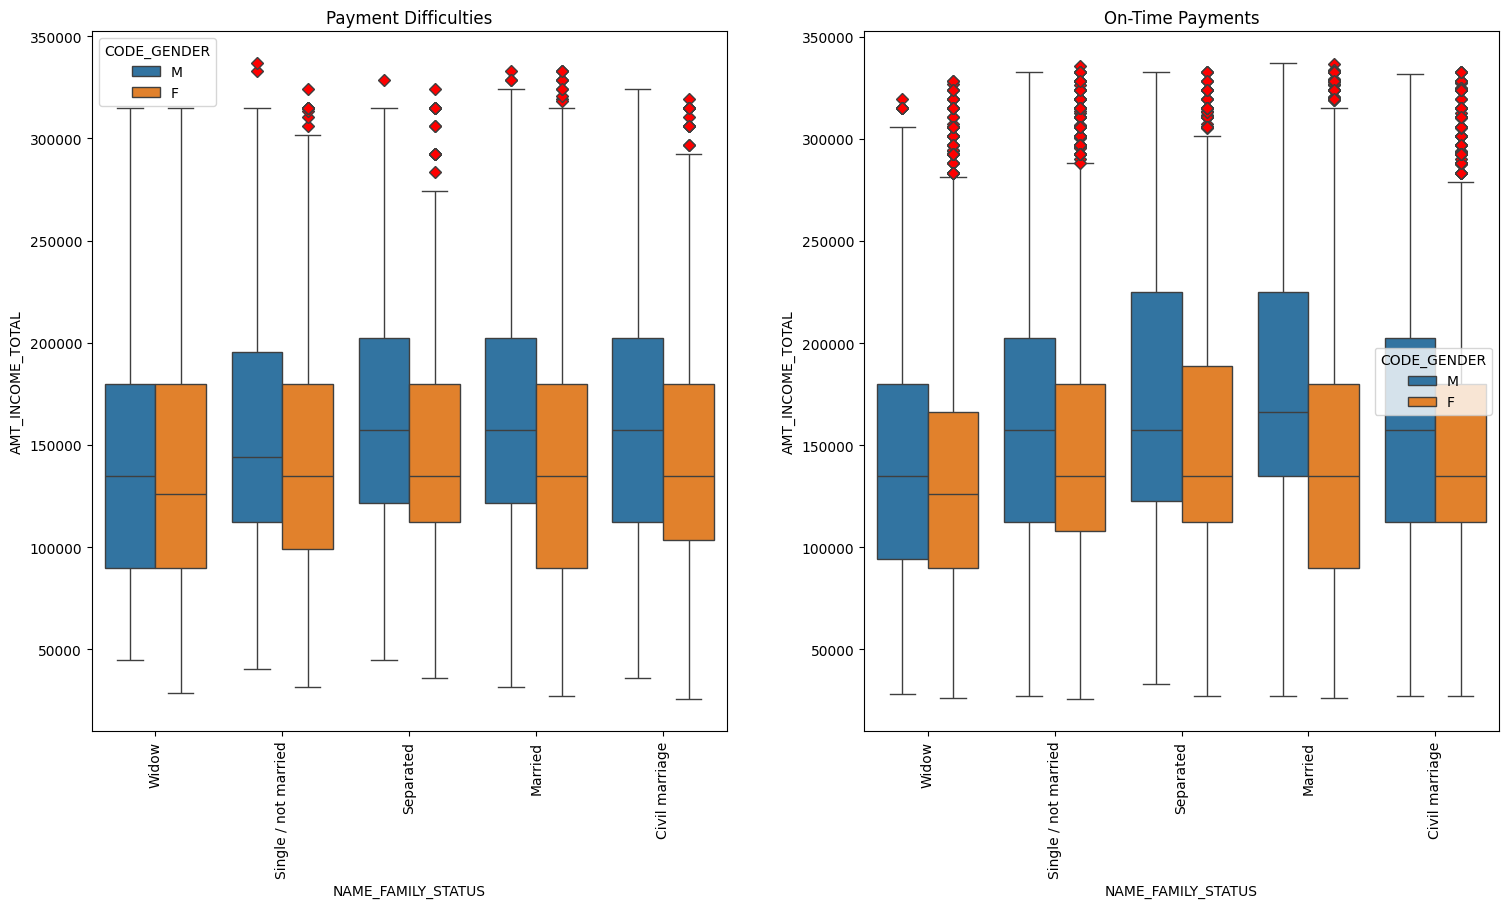

In [228]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

- Male clients who are `Single`, `Married`, `Separated` have a wide income range for timely payments, while for clients with payment issues, this range is lower.
- Female clients who are `Widow` and have payment issues have a slightly higher maximum income than those who pay on time.

Клієнт з платіжними труднощами


count      mean      std      min  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                         
20-30                Co-op apartment       40.00 148628.70 59516.24 67500.00   
                     House / apartment   4201.00 151897.22 70874.65 31500.00   
                     Municipal apartment  153.00 153608.82 78282.79 45000.00   
                     Office apartment      40.00 147375.00 50817.26 67500.00   
                     Rented apartment     229.00 144210.10 59998.66 45000.00   

                                               25%       50%       75%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                   
20-30                Co-op apartment     110250.00 135000.00 185625.00   
                     House / apartment   112500.00 135000.00 180000.00   
                     Municipal apartment 108000.00 135000.00 180000.00   
                     Office apartment    112500.00 135000.00 180000.00   
                     Rented apartment     99000.00 135000.00 180000.00   

                                               max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE              
20-30                Co-op apartment     360000.00  
                     House / apartment   810000.00  
                     Municipal apartment 675000.00  
                     Office apartment    270000.00  
                     Rented apartment    405000.00

Клієнт зі своєчасними платежами


count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       298.00 161153.15  76171.26   
                     House / apartment   33165.00 163944.39  92313.18   
                     Municipal apartment  1099.00 166235.08  88698.47   
                     Office apartment      455.00 177960.18 115765.13   
                     Rented apartment     1535.00 153028.06  70748.99   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 139500.00   
                     House / apartment   27000.00 112500.00 141264.00   
                     Municipal apartment 45000.00 112500.00 144000.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    29250.00 109125.00 135000.00   

                                               75%        max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                         
20-30                Co-op apartment     202500.00  720000.00  
                     House / apartment   202500.00 4500000.00  
                     Municipal apartment 202500.00 1417500.00  
                     Office apartment    225000.00 1800000.00  
                     Rented apartment    180000.00  742500.00

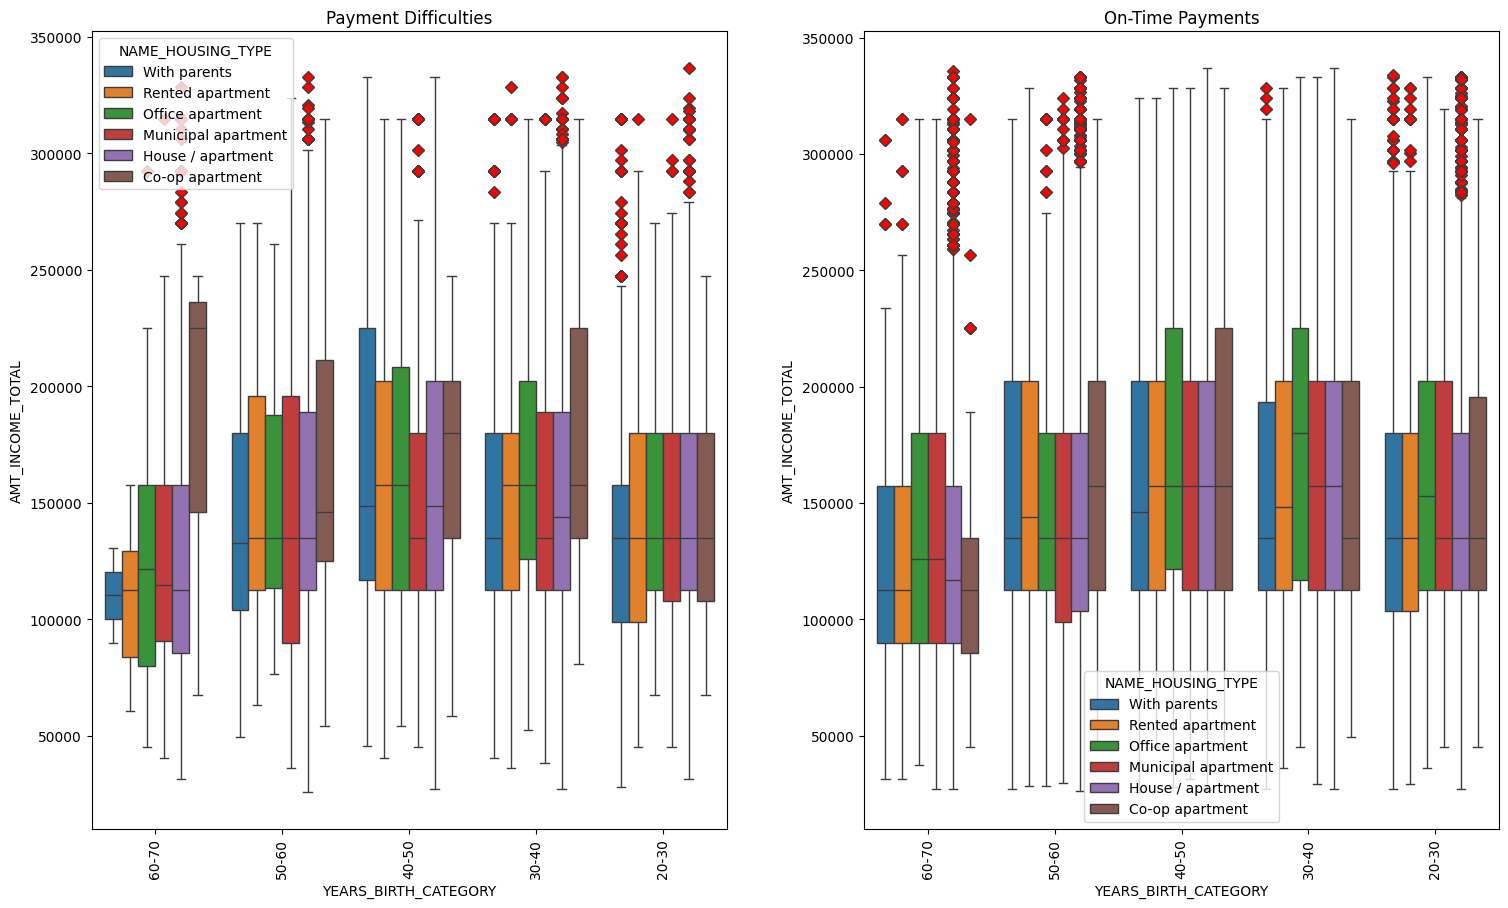

In [229]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')

- Clients aged 60-70 who "live with their parents" (possibly meaning in their parents' house) have a wider income range, while those living in "Rented apartments" and "State apartments" have a higher maximum income for timely payments, whereas for clients with payment issues, this range is significantly lower.
- Clients aged 60-70 living in "Cooperative apartments" have a significantly higher minimum and maximum income for clients with payment issues compared to those who pay on time.

- Clients aged 40-50 who "live with their parents" have a larger income range for late payments, while for clients with timely payments, this range is significantly lower.

- Clients aged 30-40 living in "Cooperative apartments" have a higher minimum and maximum income for clients with payment issues compared to those who pay on time.

Клієнт з платіжними труднощами


count      mean       std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F           2968.00 536304.02 353598.52  45000.00   
                     M           2392.00 526355.38 335793.33  45000.00   
Maternity leave      F              2.00 929250.00 715945.62 423000.00   
Pensioner            F           2243.00 494976.12 316903.86  45000.00   
                     M            739.00 486543.08 321104.43  45000.00   

                                       25%       50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F           270000.00 450000.00  675000.00 3600000.00  
                     M           270000.00 450000.00  675000.00 2961000.00  
Maternity leave      F           676125.00 929250.00 1182375.00 1435500.00  
Pensioner            F           229500.00 450000.00  675000.00 2173500.00  
                     M           229500.00 450000.00  675000.00 1800000.00

Клієнт зі своєчасними платежами


count       mean        std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Businessman          F               3.00 1125000.00 1031079.53 225000.00   
                     M               7.00 1272857.14  755104.06 495000.00   
Commercial associate F           41552.00  602132.71  400701.09  45000.00   
                     M           24705.00  620123.74  422345.24  45000.00   
Maternity leave      F               2.00  562500.00  350017.86 315000.00   

                                       25%        50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F           562500.00  900000.00 1575000.00 2250000.00  
                     M           607500.00 1350000.00 1800000.00 2250000.00  
Commercial associate F           270000.00  472500.00  837000.00 4050000.00  
                     M           270000.00  472500.00  900000.00 4050000.00  
Maternity leave      F           438750.00  562500.00  686250.00  810000.00

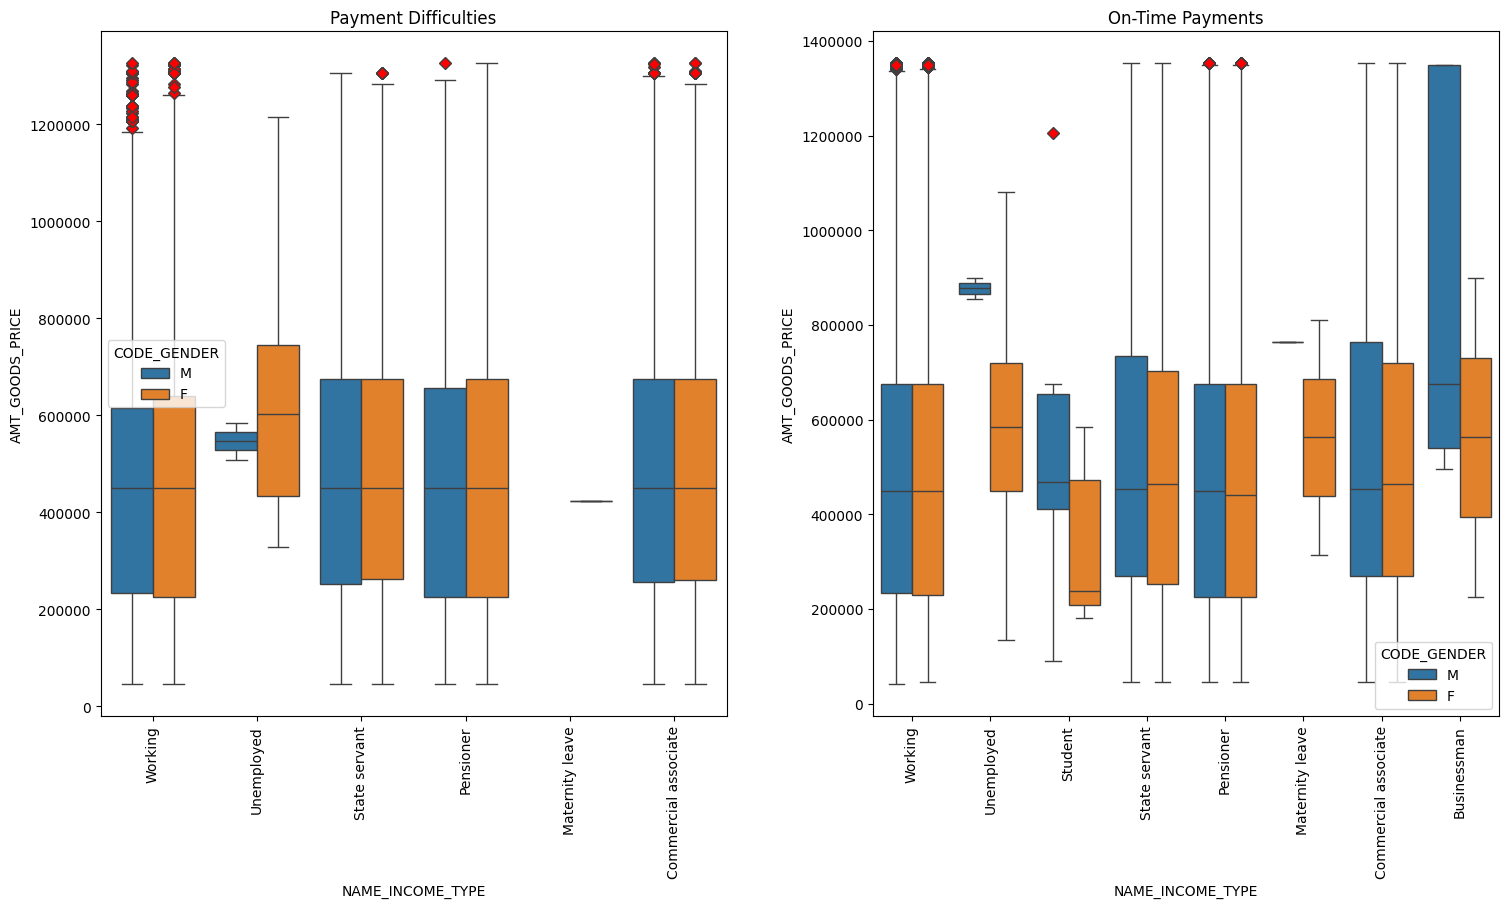

In [230]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')

- The cost of goods for "unemployed" men is significantly higher for clients with timely payments, while for clients with payment issues, the cost of goods is significantly lower.
- There is little data for students, entrepreneurs, and women on maternity leave, but those who took out loans paid on time.

Клієнт з платіжними труднощами


count      mean      std      min       25%  \
OCCUPATION_TYPE CODE_GENDER                                                
Accountants     F           457.00 174840.64 79021.04 54000.00 112500.00   
                M            17.00 202367.65 98623.66 81000.00 121500.00   
Cleaning staff  F           410.00 128907.99 70328.23 31500.00  90000.00   
                M            37.00 119493.24 45786.21 45000.00  90000.00   
Cooking staff   F           555.00 129298.38 55531.88 32400.00  90000.00   

                                  50%       75%       max  
OCCUPATION_TYPE CODE_GENDER                                
Accountants     F           157500.00 202500.00 540000.00  
                M           180000.00 252000.00 438750.00  
Cleaning staff  F           112500.00 157500.00 720000.00  
                M           112500.00 135000.00 247500.00  
Cooking staff   F           112500.00 157500.00 405000.00

Клієнт зі своєчасними платежами


count      mean       std      min       25%  \
OCCUPATION_TYPE CODE_GENDER                                                  
Accountants     F           9072.00 194324.51 109135.61 27000.00 130500.00   
                M            267.00 236490.89 131795.33 54000.00 141750.00   
Cleaning staff  F           3904.00 130602.05  63495.05 25650.00  90000.00   
                M            302.00 137172.52  64373.09 31500.00  90000.00   
Cooking staff   F           4830.00 134460.40  60213.56 27000.00  90000.00   

                                  50%       75%        max  
OCCUPATION_TYPE CODE_GENDER                                 
Accountants     F           175500.00 225000.00 2214117.00  
                M           216000.00 270000.00 1035000.00  
Cleaning staff  F           112500.00 157500.00 1080000.00  
                M           132750.00 169875.00  450000.00  
Cooking staff   F           121500.00 157500.00  540000.00

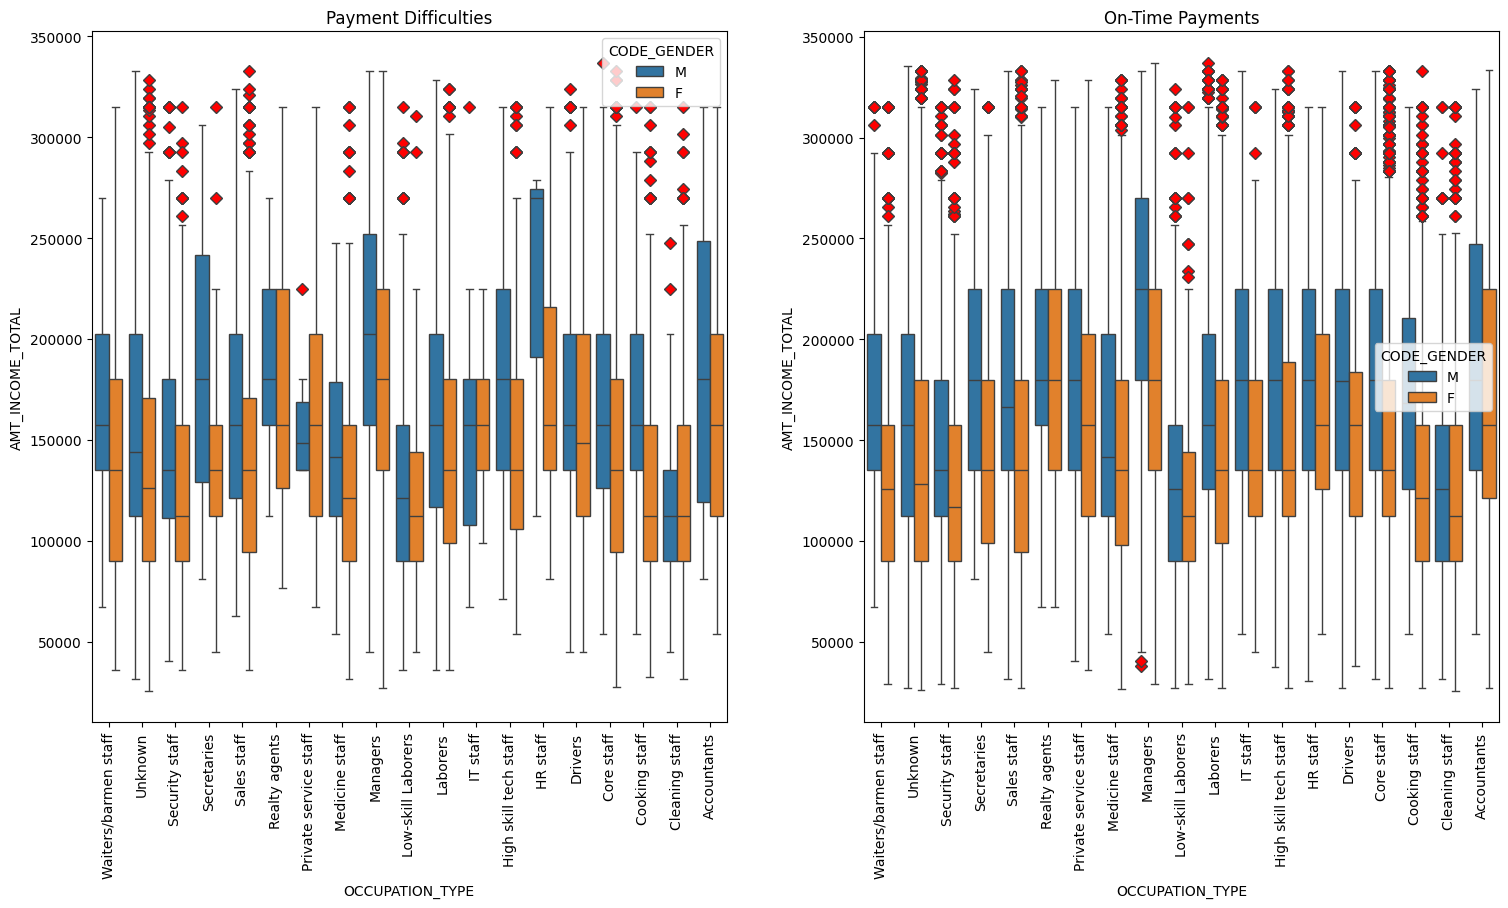

In [231]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER')

- Female clients in the position of "Secretary" have a wide income range for timely payments, while for female clients with payment issues, this range is lower.
- Male clients in the position of "Private Service Staff" have a much smaller income range for late payments, while for clients with timely payments, this range is significantly larger.
- Male clients in the positions of "Driver," "Main Staff," and "IT" have a higher maximum income for timely payments, while for male clients with payment issues, this range is lower.
- Male clients in the position of "HR" have a significantly higher minimum and maximum income for late payments, while for clients with timely payments, this range is significantly smaller.

## Categorical and categorical variables

### Analysis of columns `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [232]:
def bi_countplot_target(df0, df1, column, hue_column) :
    group_name = f'Normalized distribution of values by category: {column}'
    print (group_name.upper())

    pltname = 'Clients with payment difficulties'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    # annotation of values in the bar plot
    for container in ax.containers:
      ax. bar_label(container, fmt='{:,.1f}%')

    pltname = 'Clients with timely payments'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    #------------
    group_name = f'Count of values by category {column}'
    print(group_name.upper())

    pltname = 'Clients with payment difficulties'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Clients with timely payments'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

NORMALIZED DISTRIBUTION OF VALUES BY CATEGORY: NAME_INCOME_TYPE


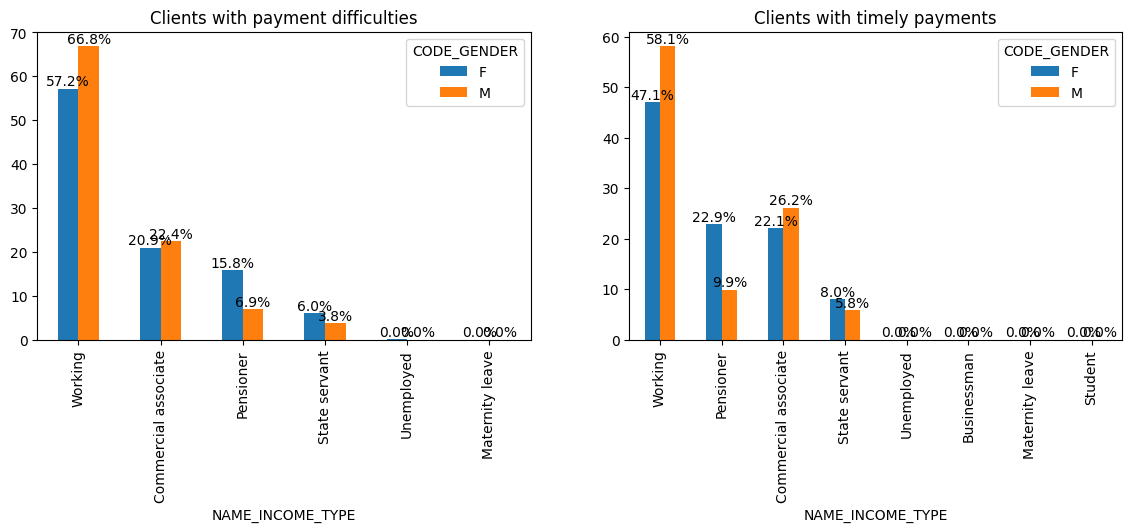

COUNT OF VALUES BY CATEGORY NAME_INCOME_TYPE


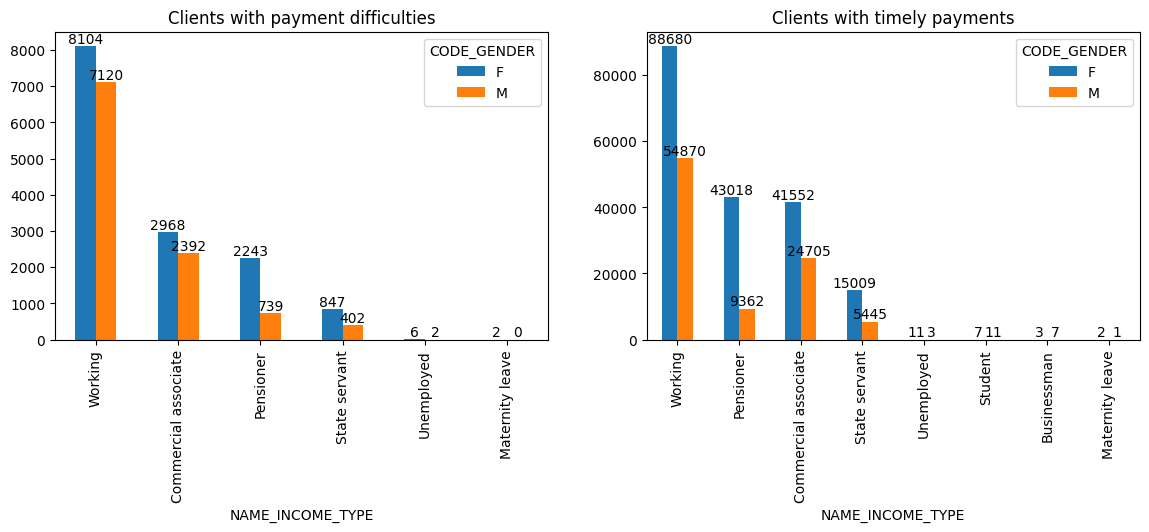

In [233]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Observations**
- Clients in the `Working` and `Male` categories have more difficulties with payments compared to those who pay on time.
- Clients in the `Pensioner` and `Female` categories have more difficulties with payments compared to those who pay on time.
- Clients in the `Businessman` and `Student` categories make payments on time, although their history is small.

# Analysis of Interdependencies Between Two Categorical Variables

Analysis of dependencies between categorical variables for pairs of variables

- NAME_EDUCATION_TYPE vs CODE_GENDER

- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

NORMALIZED DISTRIBUTION OF VALUES BY CATEGORY: NAME_EDUCATION_TYPE


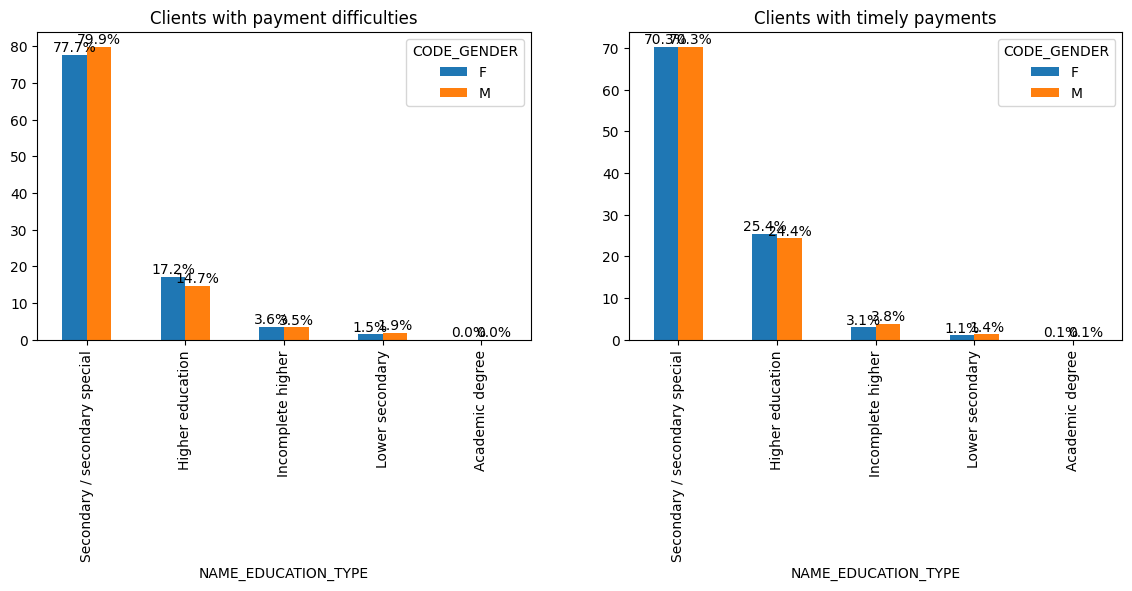

COUNT OF VALUES BY CATEGORY NAME_EDUCATION_TYPE


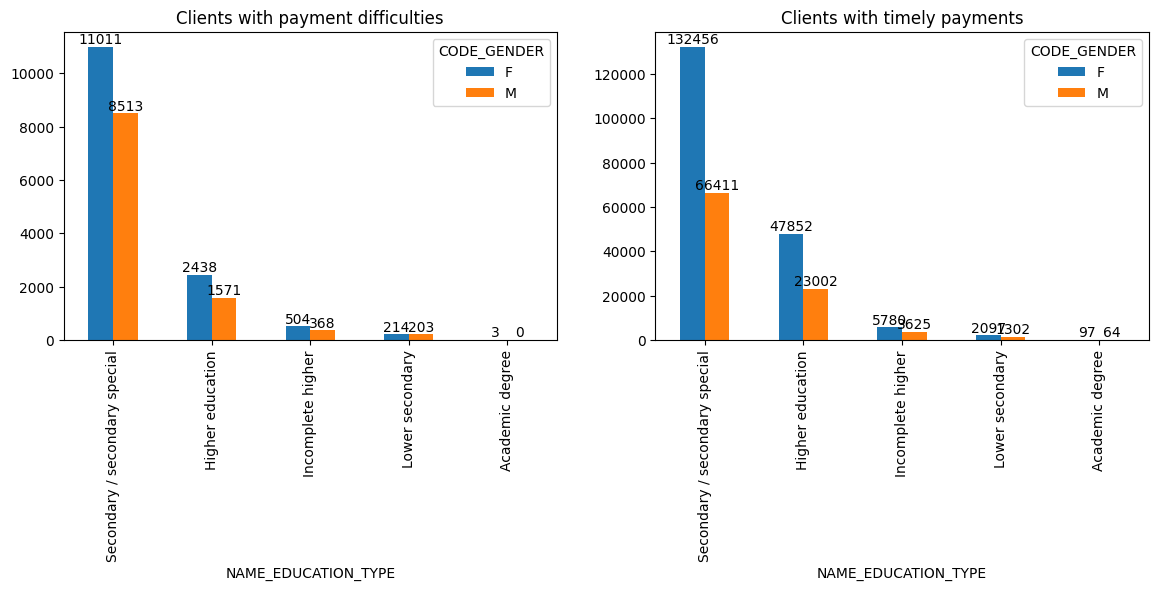

In [234]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

- Clients in the `Higher education`, `Female`, and `Male` categories are more likely to make payments on time than those who have payment difficulties.
- Clients in the `Secondary education`, `Male`, and especially `Female` categories have more difficulties with payments compared to those who pay on time.

In [235]:
def bi_countplot_target_mas(df0, df1, column, hue_column) :
    group_name = f'Normalized distribution of values by category: {column}'
    print (group_name.upper())

    pltname = 'Client with payment difficulties'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(20,10)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)


    pltname = 'Clients with timely payments'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)


    plt.show()

    #------------
    group_name = f'Count of values by category {column}'
    print(group_name.upper())

    pltname = 'Client with payment difficulties'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Clients with timely payments'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

NORMALIZED DISTRIBUTION OF VALUES BY CATEGORY: OCCUPATION_TYPE


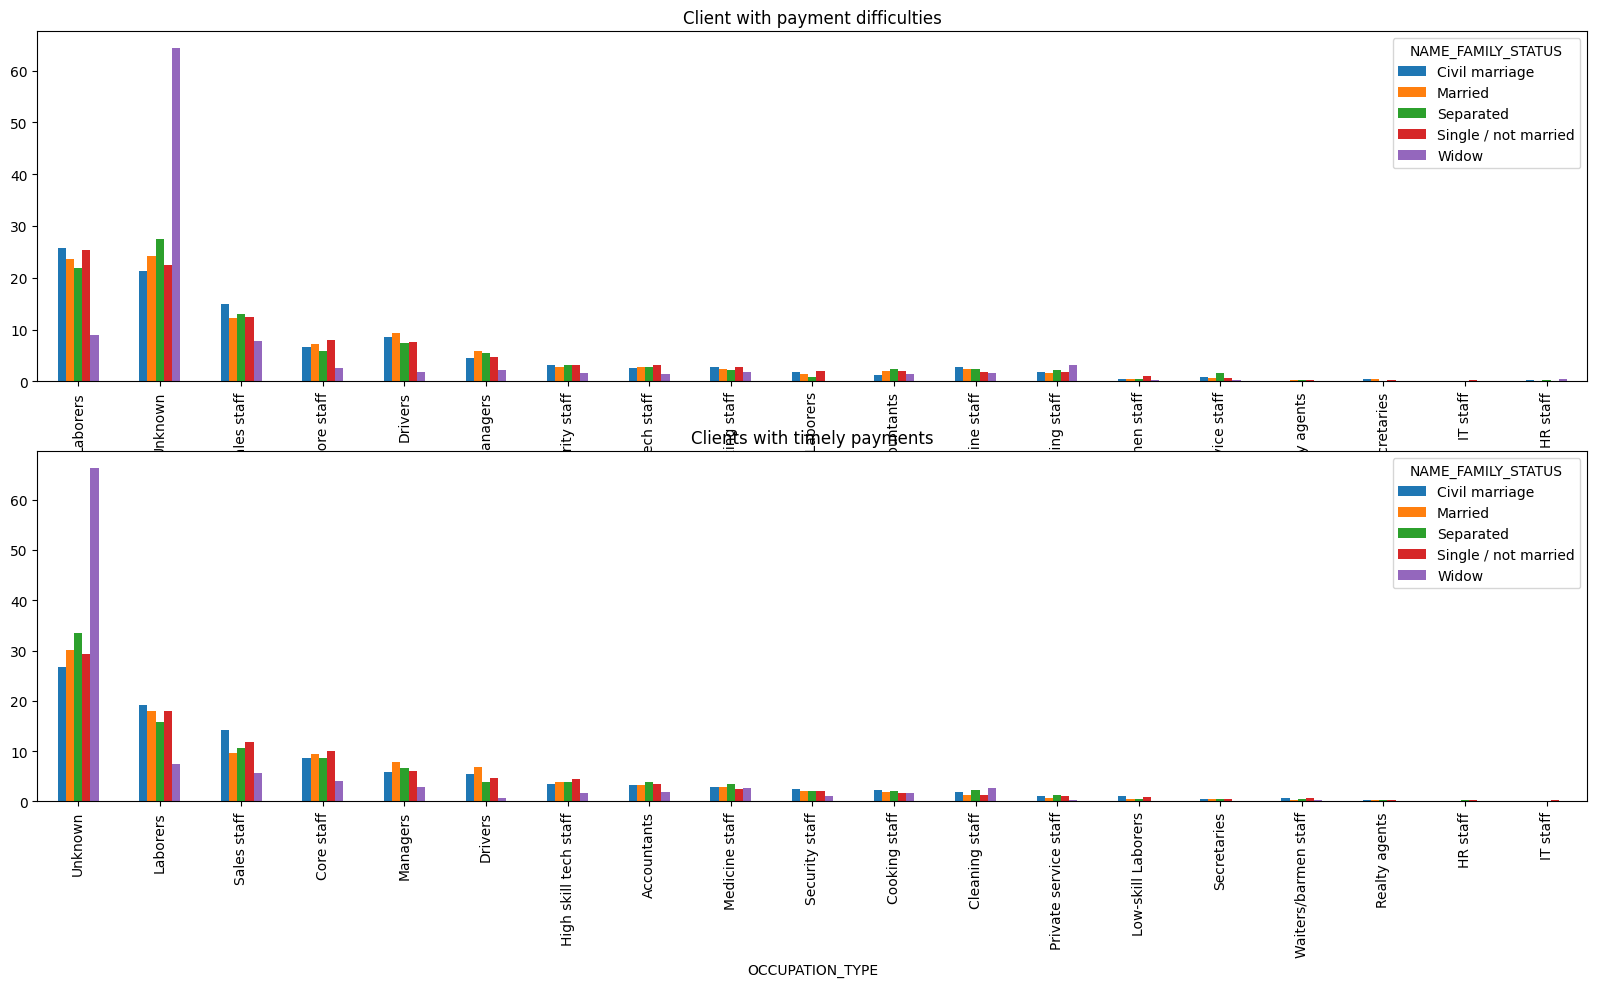

COUNT OF VALUES BY CATEGORY OCCUPATION_TYPE


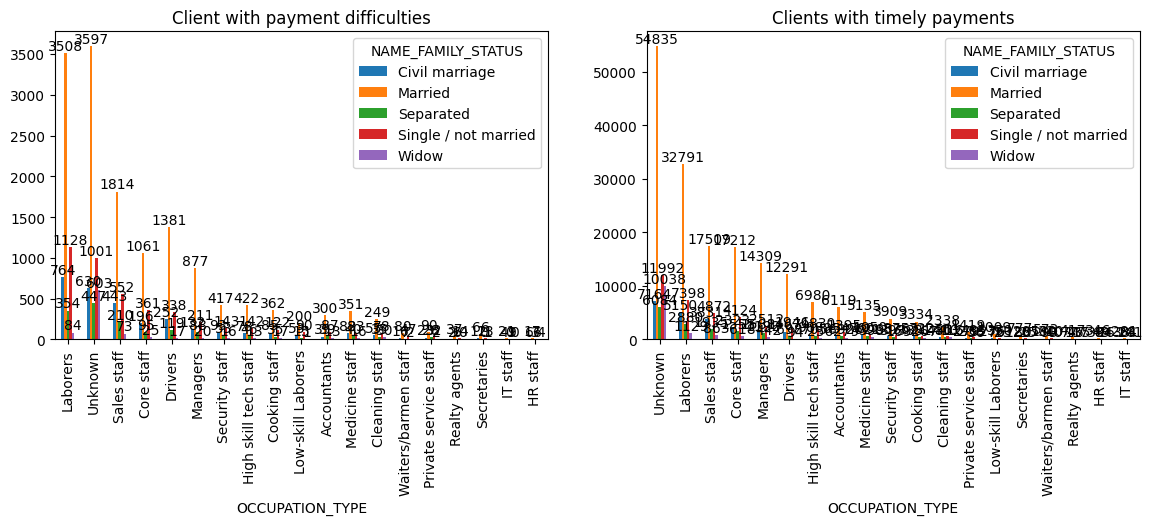

In [236]:
bi_countplot_target_mas(df0, df1, 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS')

Clients with the `Unknown` category more frequently return credit.

NORMALIZED DISTRIBUTION OF VALUES BY CATEGORY: OCCUPATION_TYPE


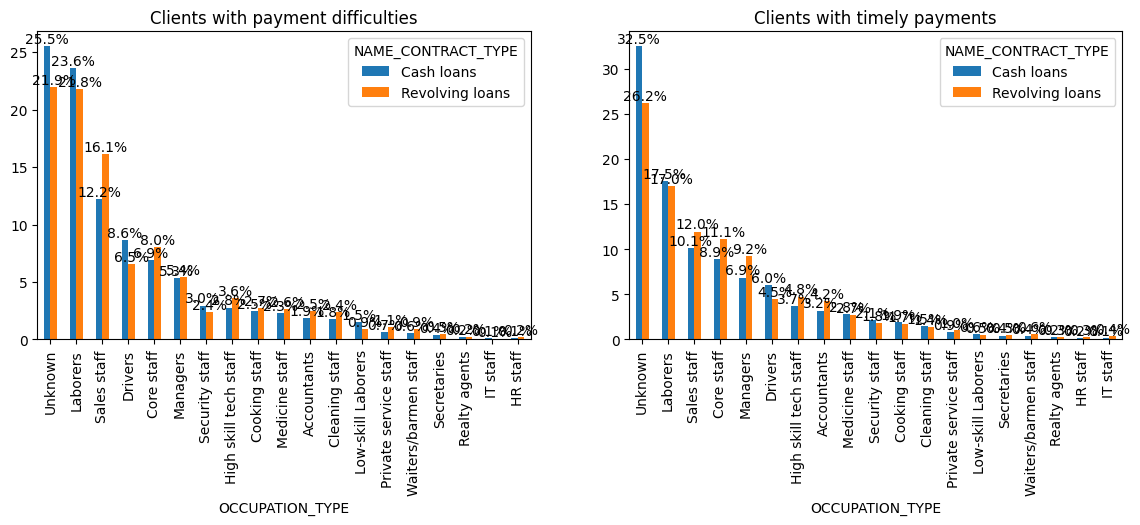

COUNT OF VALUES BY CATEGORY OCCUPATION_TYPE


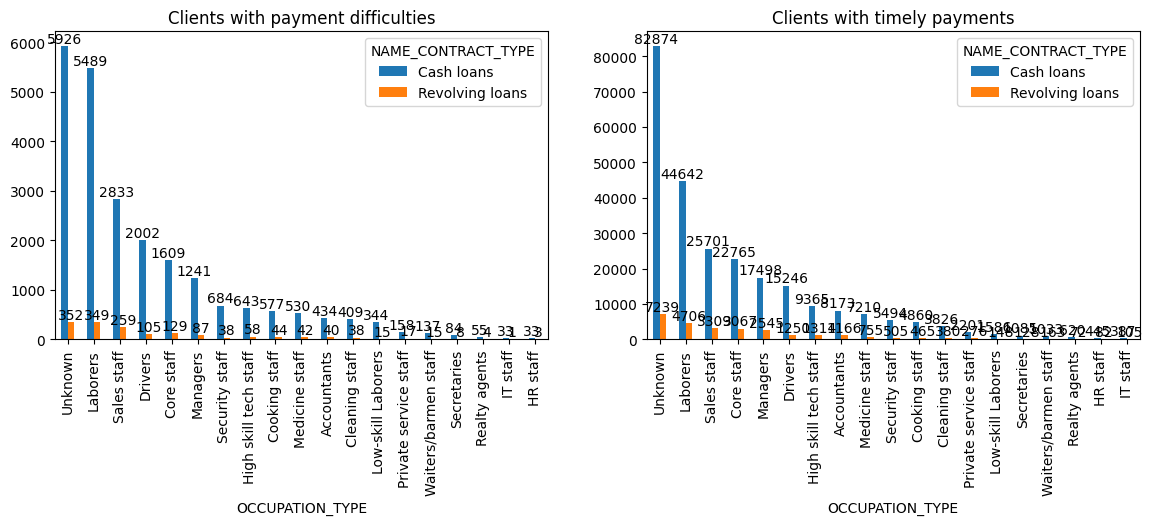

In [237]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE')

- Clients in the `Cash loans` and `Unknown` categories make payments on time more often than those who have payment difficulties.
- Clients in the `Laborers` category have more payment difficulties compared to those who pay on time.
- Clients in the `Sales staff` and `Revolving loans` categories have more payment difficulties compared to those who pay on time.
- Clients in the `Drivers` and `Cash loans` categories have more payment difficulties compared to those who pay on time.
- A large number of clients have `Cash loans`.
- Clients in the `Managers` and `Revolving loans` categories make payments on time more often than those who have payment difficulties.

***

# Conclusion: Customer Categories to Target When Providing Loans

From the graphs we built and the conclusions we made, we can create a portrait of a client who will not have problems with loan repayment. Thus, the ideal client has **higher education**, is **married**, over **40** years old, and works as a **manager** or **businessman**. Other categories do not affect or have a weak influence on successful loan repayment.

***

**Further steps** could include exploring more advanced feature engineering techniques, applying different outlier handling methods, and experimenting with various data scaling approaches. It is also crucial to address the imbalance in the target variable during model training using appropriate strategies.

This preprocessed data will serve as a solid foundation for the next stages of the credit risk analysis project, allowing to develop more accurate and robust models for predicting creditworthiness.